In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime

In [3]:
import os
os.getcwd()

'C:\\Users\\Ananth'

In [5]:
os.chdir('C://Users//Ananth//Downloads//Time Series Forecasting//Project')

In [6]:
df = pd.read_csv('Sparkling.csv')

In [7]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [8]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [9]:
date = pd.date_range(start = '01/01/1980', end = '08/01/1995', freq = 'M')

In [10]:
df['Time_Stamp'] = pd.DataFrame(date)

In [11]:
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    object        
 1   Sparkling   187 non-null    int64         
 2   Time_Stamp  187 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.5+ KB


In [13]:
df = df.drop(['YearMonth'], axis = 1)

In [14]:
df = df.set_index(keys = 'Time_Stamp')

In [15]:
df.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [16]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

In [17]:
df.isnull().sum()

Sparkling    0
dtype: int64

In [18]:
df.isna().sum()

Sparkling    0
dtype: int64

In [19]:
df.notna().sum()

Sparkling    187
dtype: int64

In [20]:
df.shape

(187, 1)

### Plotting Time series data:

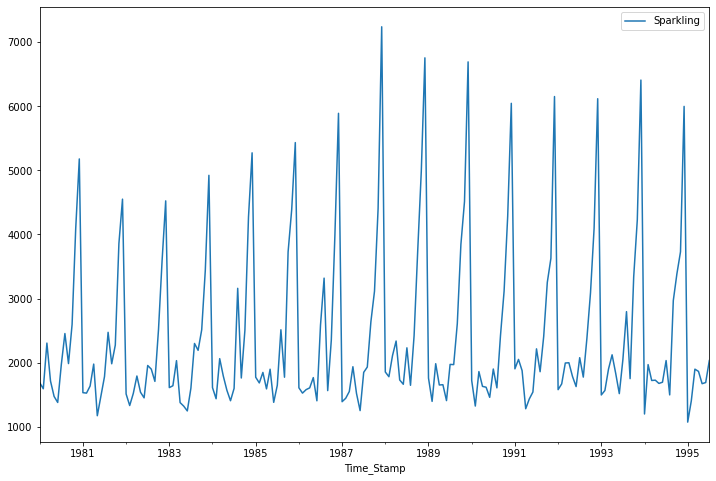

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
df.plot()
plt.show()

### Plotting Time series data along with Mean and Median:

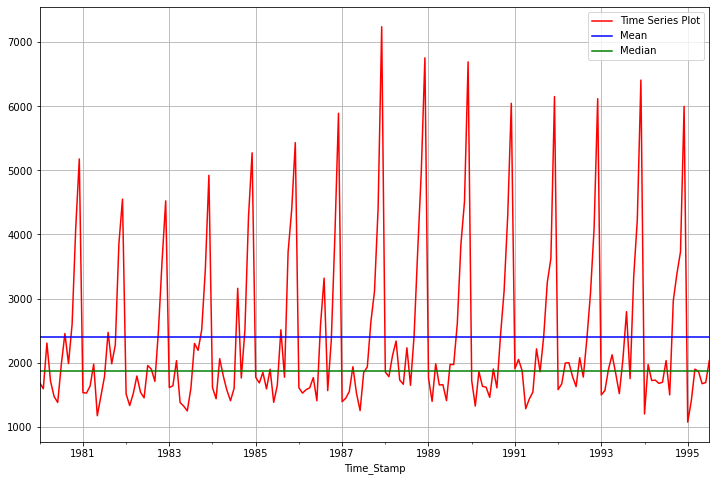

In [22]:
df.plot(color='Red')
plt.axhline(df['Sparkling'].mean(),color='Blue')
plt.axhline(df['Sparkling'].median(),color='Green')
plt.grid()
plt.legend(['Time Series Plot','Mean','Median']);

### Boxplot of Time series data:

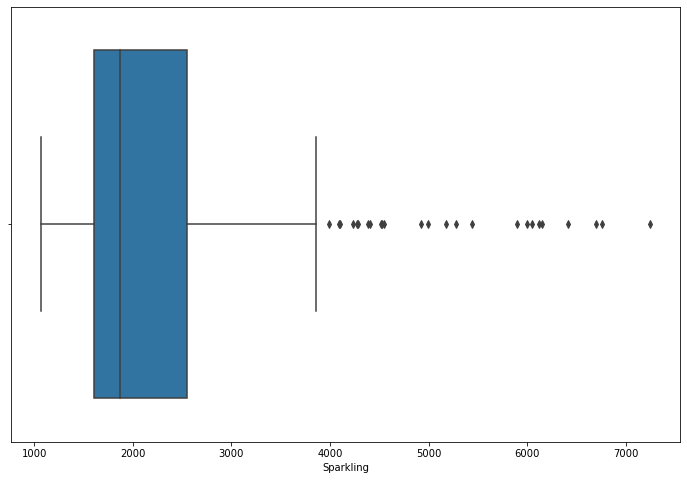

In [23]:
sns.boxplot(df['Sparkling'])

### Quarterly comparison of shipments using barplot:

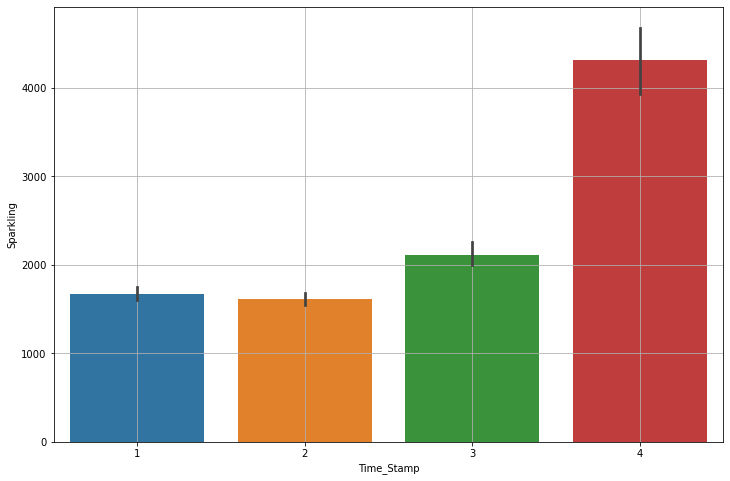

In [24]:
sns.barplot(df.index.quarter,df.Sparkling,data=df)
plt.grid();

### Monthly comparison of shipments using barplot:

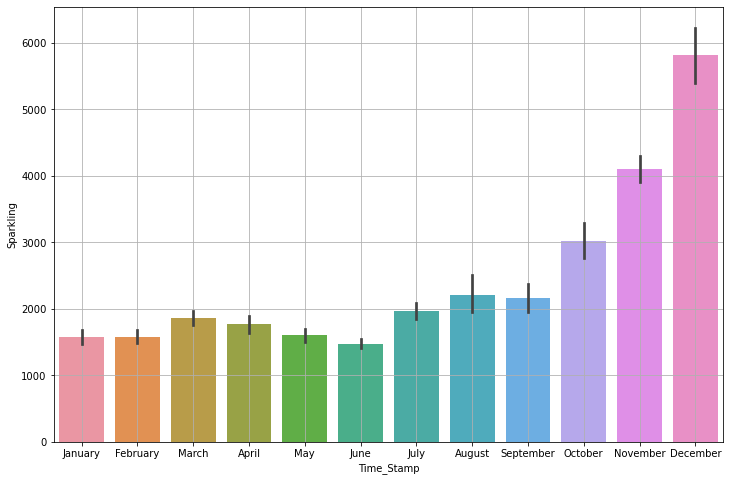

In [25]:
sns.barplot(df.index.month_name(),df.Sparkling,data=df)
plt.grid();

### Distribution plot for quarterly comparison of Rose wine sales:

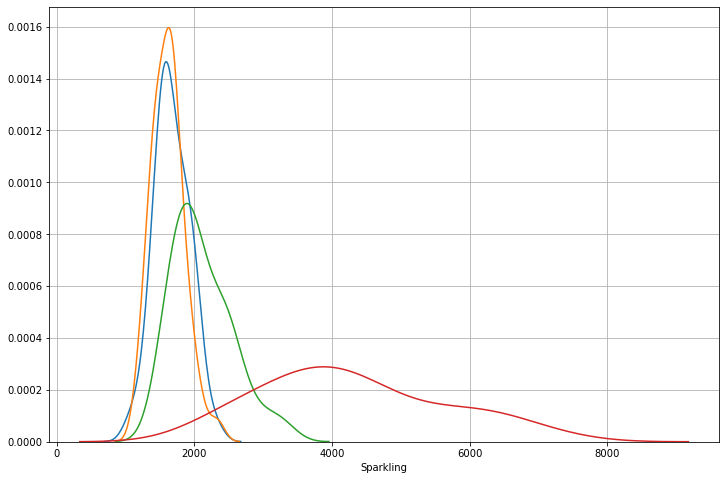

In [26]:
sns.distplot(df.loc[df.index.quarter == 1]['Sparkling'],hist = False)
sns.distplot(df.loc[df.index.quarter == 2]['Sparkling'],hist = False)
sns.distplot(df.loc[df.index.quarter == 3]['Sparkling'],hist = False)
sns.distplot(df.loc[df.index.quarter == 4]['Sparkling'],hist = False)
plt.grid();
# Green is quarter 3
# Orange is quarter 2
# Red is quarter 4
# Blue is quarter 1

### Monthly sales across years:

In [34]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month_name(), index = df.index.year)
monthly_sales_across_years

Time_Stamp   April  August  December  February  January    July    June  \
Time_Stamp                                                                
1980        1712.0  2453.0    5179.0    1591.0   1686.0  1966.0  1377.0   
1981        1976.0  2472.0    4551.0    1523.0   1530.0  1781.0  1480.0   
1982        1790.0  1897.0    4524.0    1329.0   1510.0  1954.0  1449.0   
1983        1375.0  2298.0    4923.0    1638.0   1609.0  1600.0  1245.0   
1984        1789.0  3159.0    5274.0    1435.0   1609.0  1597.0  1404.0   
1985        1589.0  2512.0    5434.0    1682.0   1771.0  1645.0  1379.0   
1986        1605.0  3318.0    5891.0    1523.0   1606.0  2584.0  1403.0   
1987        1935.0  1930.0    7242.0    1442.0   1389.0  1847.0  1250.0   
1988        2336.0  1645.0    6757.0    1779.0   1853.0  2230.0  1661.0   
1989        1650.0  1968.0    6694.0    1394.0   1757.0  1971.0  1406.0   
1990        1628.0  1605.0    6047.0    1321.0   1720.0  1899.0  1457.0   
1991        1279.0  1857.0    6153.0    2049.0   1902.0  2214.0  1540.0   
1992        1997.0  1773.0    6119.0    1667.0   1577.0  2076.0  1625.0   
1993        2121.0  2795.0    6410.0    1564.0   1494.0  2048.0  1515.0   
1994        1725.0  1495.0    5999.0    1968.0   1197.0  2031.0  1693.0   
1995        1862.0     NaN       NaN    1402.0   1070.0  2031.0  1688.0   

Time_Stamp   March     May  November  October  September  
Time_Stamp                                                
1980        2304.0  1471.0    4087.0   2596.0     1984.0  
1981        1633.0  1170.0    3857.0   2273.0     1981.0  
1982        1518.0  1537.0    3593.0   2514.0     1706.0  
1983        2030.0  1320.0    3440.0   2511.0     2191.0  
1984        2061.0  1567.0    4273.0   2504.0     1759.0  
1985        1846.0  1896.0    4388.0   3727.0     1771.0  
1986        1577.0  1765.0    3987.0   2349.0     1562.0  
1987        1548.0  1518.0    4405.0   3114.0     2638.0  
1988        2108.0  1728.0    4988.0   3740.0     2421.0  
1989        1982.0  1654.0    4514.0   3845.0     2608.0  
1990        1859.0  1615.0    4286.0   3116.0     2424.0  
1991        1874.0  1432.0    3627.0   3252.0     2408.0  
1992        1993.0  1783.0    4096.0   3088.0     2377.0  
1993        1898.0  1831.0    4227.0   3339.0     1749.0  
1994        1720.0  1674.0    3729.0   3385.0     2968.0  
1995        1897.0  1670.0       NaN      NaN        NaN

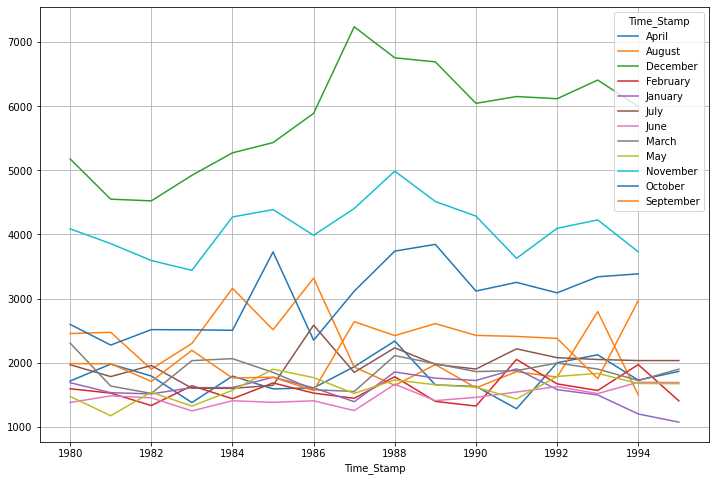

In [35]:
monthly_sales_across_years.plot()
plt.grid()

### Yearly sales across months:

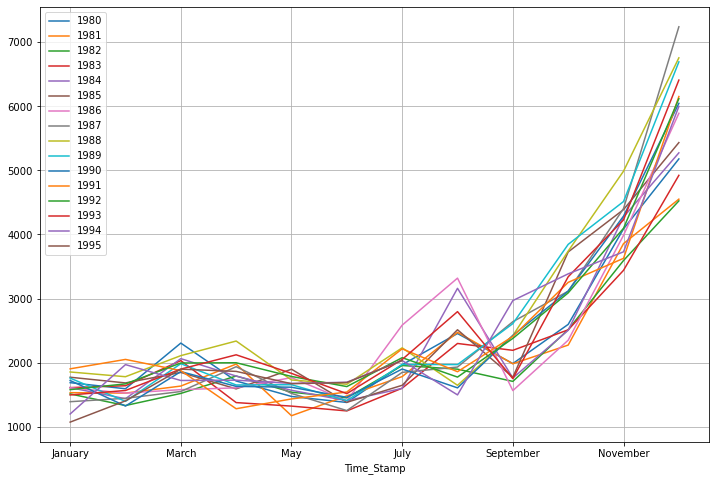

In [36]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October','November', 'December']
yearly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.year,index = df.index.month_name())
yearly_sales_across_years = yearly_sales_across_years.reindex(index = months)
yearly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

### Plot ECDF: Empirical Cumulative Distribution Function:

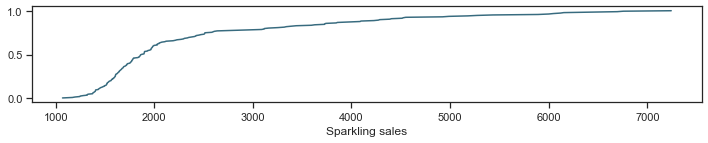

In [37]:
#ECDF - Adds up the number of observations that are there for a certain value.
from statsmodels.distributions.empirical_distribution import ECDF

sns.set(style = "ticks")# to format into seaborn 
c = '#386B7F' # basic color for plots
plt.figure(figsize = (12, 6))

  
plt.subplot(312)
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = c)
plt.xlabel('Sparkling sales');

### Average sales and percentage change:

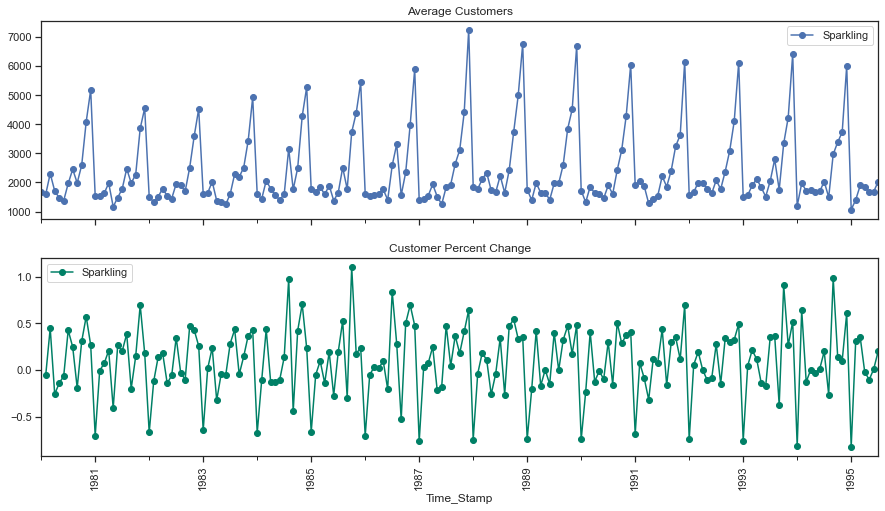

In [38]:
# group by date and get average Customers, and precent change
average_customers    = df.groupby('Time_Stamp')["Sparkling"].mean()
pct_change_customers = df.groupby('Time_Stamp')["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Customers over time(year-month)
ax1 = average_customers.plot(legend=True,ax=axis1,marker='o',title="Average Customers")
ax1.set_xticks(range(len(average_customers)))
ax1.set_xticklabels(average_customers.index.tolist(), rotation=90)
# plot precent change for Customers over time(year-month)
ax2 = pct_change_customers.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Customer Percent Change")

### Decomposition of Time Series:

### Additive decomposition:

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Sparkling'],model = 'additive')

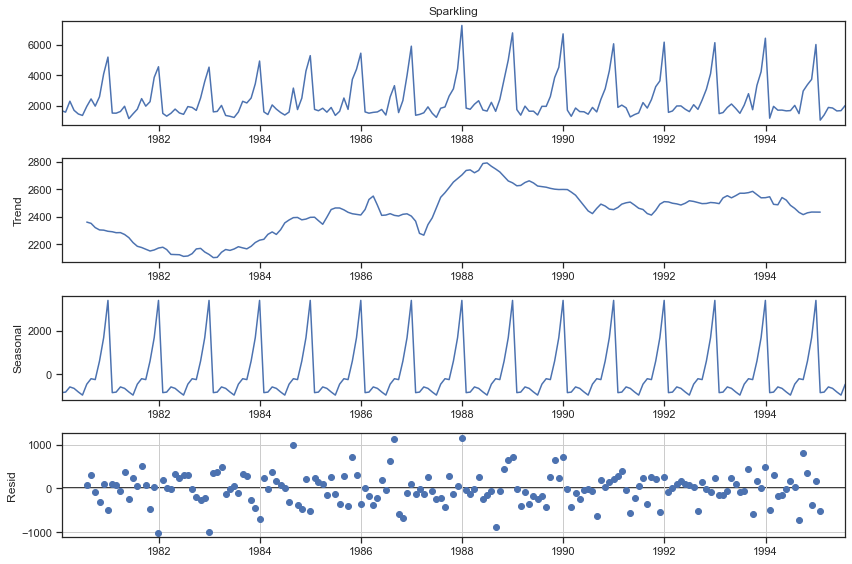

In [40]:
df_add_decompose.plot()
plt.grid()

In [41]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
                 ...    
1995-03-31   -592.356630
1995-04-30   -658.490559
1995-05-31   -824.416154
1995-06-30   -967.434011
1995-07-31   -465.502265
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



Text(0.5, 1.0, 'Additive model - Trend plot')

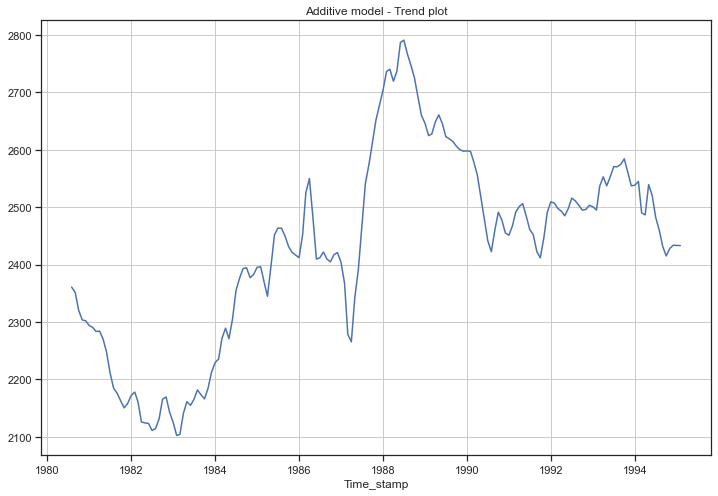

In [49]:
plt.plot(trend)
plt.grid();
plt.xlabel('Time_stamp')
plt.title('Additive model - Trend plot')

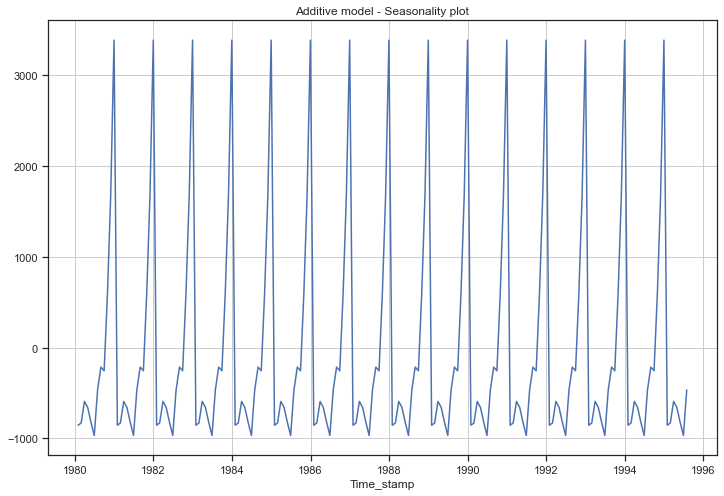

In [50]:
plt.plot(seasonality)
plt.title('Additive model - Seasonality plot')
plt.xlabel('Time_stamp')
plt.grid();

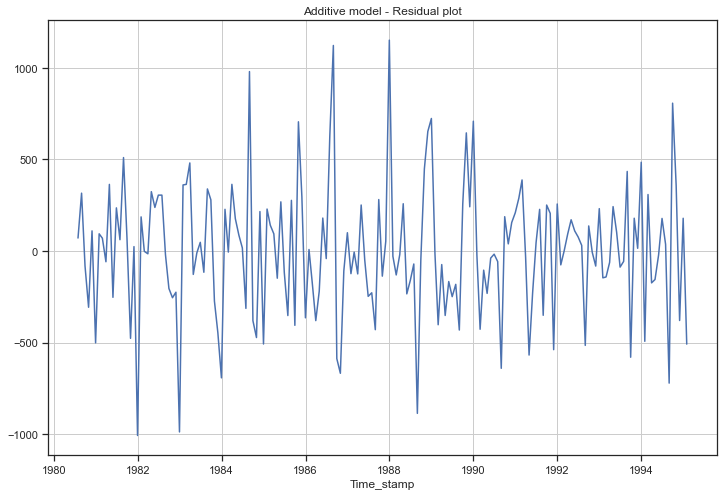

In [51]:
plt.plot(residual)
plt.title('Additive model - Residual plot')
plt.xlabel('Time_stamp')
plt.grid();

### Multiplicative decomposition:

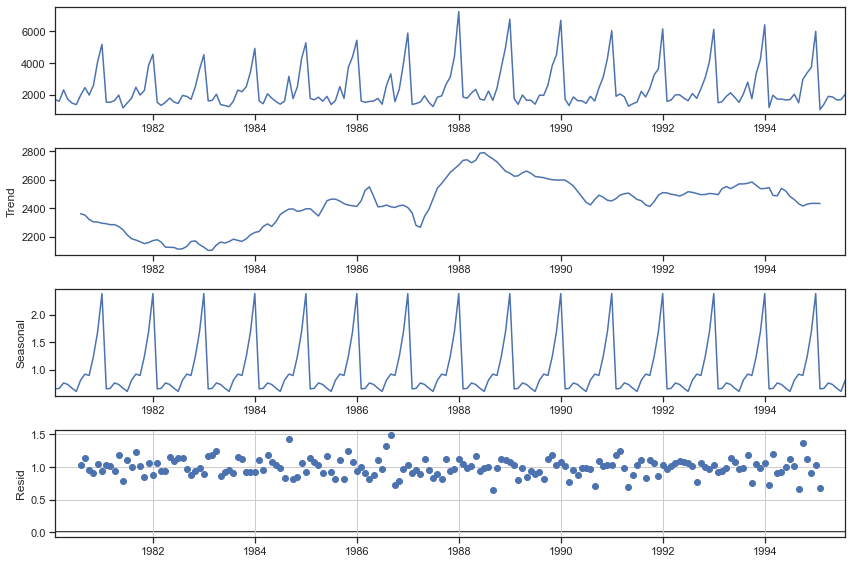

In [52]:
df_mul_decompose = seasonal_decompose(df,model = 'multiplicative')
df_mul_decompose.plot()
plt.grid();

In [53]:
trend = df_mul_decompose.trend
seasonality = df_mul_decompose.seasonal
residual = df_mul_decompose.resid

print('Trend','\n',trend,'\n')
print('Seasonality','\n',seasonality,'\n')
print('Residual','\n',residual,'\n')

Trend 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: trend, Length: 187, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
                ...   
1995-03-31    0.757440
1995-04-30    0.730351
1995-05-31    0.660609
1995-06-30    0.603468
1995-07-31    0.809164
Name: seasonal, Length: 187, dtype: float64 

Residual 
 Time_Stamp
1980-01-31   NaN
1980-02-29   NaN
1980-03-31   NaN
1980-04-30   NaN
1980-05-31   NaN
              ..
1995-03-31   NaN
1995-04-30   NaN
1995-05-31   NaN
1995-06-30   NaN
1995-07-31   NaN
Name: resid, Length: 187, dtype: float64 



Text(0.5, 1.0, 'Multiplicative model - Trend plot')

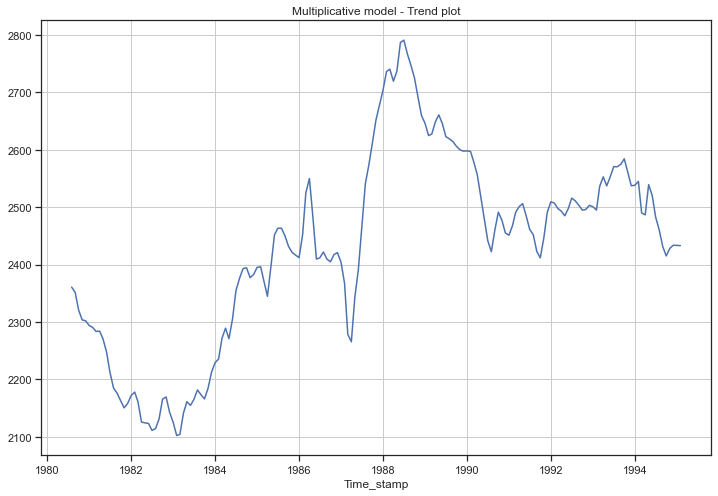

In [54]:
plt.plot(trend)
plt.grid();
plt.xlabel('Time_stamp')
plt.title('Multiplicative model - Trend plot')

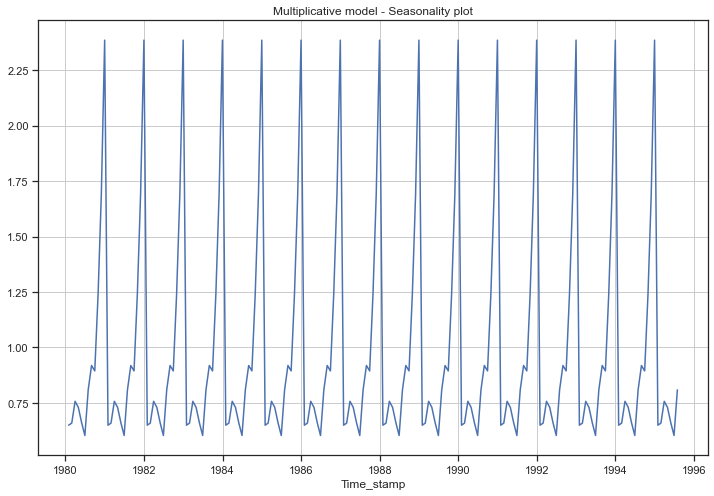

In [55]:
plt.plot(seasonality)
plt.title('Multiplicative model - Seasonality plot')
plt.xlabel('Time_stamp')
plt.grid();

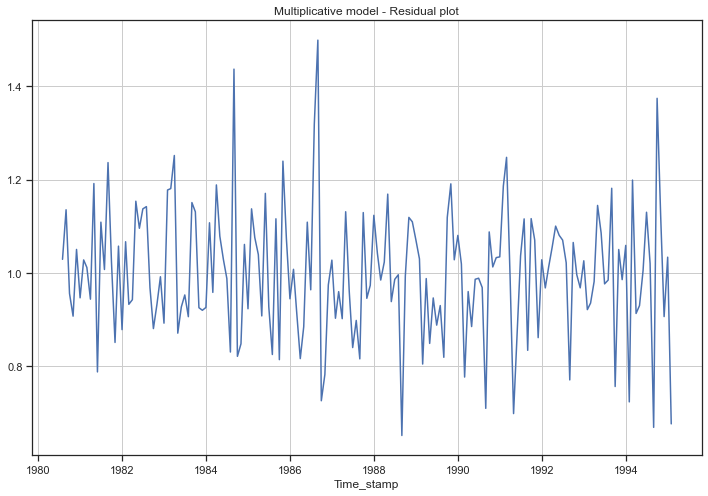

In [56]:
plt.plot(residual)
plt.title('Multiplicative model - Residual plot')
plt.xlabel('Time_stamp')
plt.grid();

Because of the high residual distribution in the additive decomposition, we choose the mutiplicative model.

### Splitting the data into train and test:

In [57]:
train = df[df.index.year < 1991]
test = df[df.index.year >= 1991]

In [58]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [59]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
             Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471 

Last few rows of Training Data 
             Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047 

First few rows of Test Data 
             Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432 

Last few rows of Test Data 
             Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031 



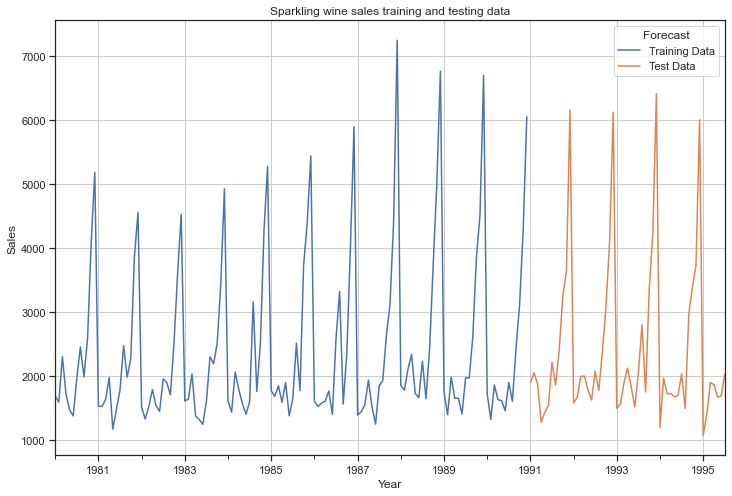

In [60]:
train['Sparkling'].plot()
test['Sparkling'].plot()
plt.grid()
plt.title('Sparkling wine sales training and testing data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['Training Data','Test Data'],title='Forecast');

### Simple Exponential Smoothing model:

In [61]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display

In [62]:
model_SES = SimpleExpSmoothing(train)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [63]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters

model_SES_autofit = model_SES.fit(optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [64]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7794745807805,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [65]:
# Using the fitted model on the training set to forecast on the test set:

SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2403.779475
1991-02-28    2403.779475
1991-03-31    2403.779475
1991-04-30    2403.779475
1991-05-31    2403.779475
1991-06-30    2403.779475
1991-07-31    2403.779475
1991-08-31    2403.779475
1991-09-30    2403.779475
1991-10-31    2403.779475
1991-11-30    2403.779475
1991-12-31    2403.779475
1992-01-31    2403.779475
1992-02-29    2403.779475
1992-03-31    2403.779475
1992-04-30    2403.779475
1992-05-31    2403.779475
1992-06-30    2403.779475
1992-07-31    2403.779475
1992-08-31    2403.779475
1992-09-30    2403.779475
1992-10-31    2403.779475
1992-11-30    2403.779475
1992-12-31    2403.779475
1993-01-31    2403.779475
1993-02-28    2403.779475
1993-03-31    2403.779475
1993-04-30    2403.779475
1993-05-31    2403.779475
1993-06-30    2403.779475
1993-07-31    2403.779475
1993-08-31    2403.779475
1993-09-30    2403.779475
1993-10-31    2403.779475
1993-11-30    2403.779475
1993-12-31    2403.779475
1994-01-31    2403.779475
1994-02-28    2403.779475
1994-03-31  

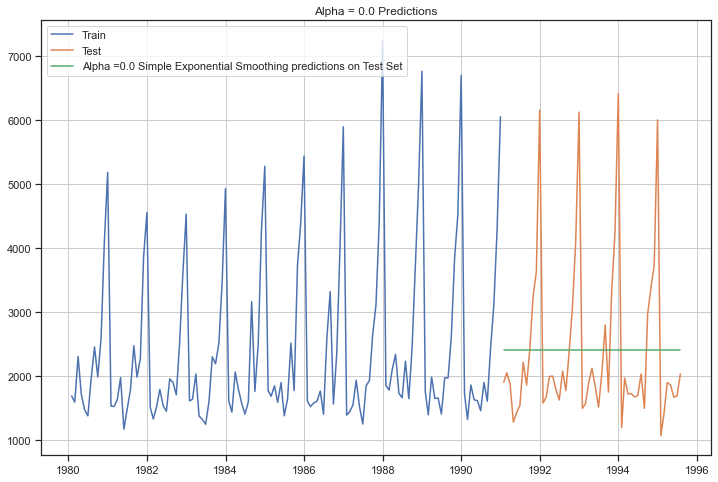

In [66]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.0 Predictions');

### Report model accuracy

In [67]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 1275.0818006854338


In [68]:
resultsDf1 = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.0,SES'])
resultsDf1

Test RMSE
Alpha=0.0,SES  1275.081801

### Triple Exponential Smoothing model or Holt Winter's linear method:

### ETS(A, A, A) : With additive trend and seasonality:

In [69]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.08605486904839121, 'smoothing_slope': 3.0065005259908405e-11, 'smoothing_seasonal': 0.4764515004410269, 'damping_slope': nan, 'initial_level': 1684.1795219442665, 'initial_slope': 0.00011104702708856804, 'initial_seasons': array([  39.26447462,  -37.93813084,  467.23619656,  204.38991004,
       -141.44503318, -158.60906468,  337.92815744,  856.29238658,
        402.81237559,  971.07851572, 2402.17292498, 3428.08086093]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [70]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1532.697638
1991-02-28    1241.614060
1991-03-31    1727.003977
1991-04-30    1584.503043
1991-05-31    1494.188859
1991-06-30    1311.636277
1991-07-31    1834.998150
1991-08-31    1696.214159
1991-09-30    2338.999014
1991-10-31    3249.377165
1991-11-30    4324.525474
1991-12-31    6461.638277
1992-01-31    1532.698970
1992-02-29    1241.615392
1992-03-31    1727.005310
1992-04-30    1584.504376
1992-05-31    1494.190192
1992-06-30    1311.637609
1992-07-31    1834.999483
1992-08-31    1696.215491
1992-09-30    2339.000346
1992-10-31    3249.378498
1992-11-30    4324.526806
1992-12-31    6461.639610
1993-01-31    1532.700303
1993-02-28    1241.616725
1993-03-31    1727.006642
1993-04-30    1584.505708
1993-05-31    1494.191524
1993-06-30    1311.638942
1993-07-31    1835.000815
1993-08-31    1696.216824
1993-09-30    2339.001679
1993-10-31    3249.379830
1993-11-30    4324.528139
1993-12-31    6461.640942
1994-01-31    1532.701636
1994-02-28    1241.618057
1994-03-31  

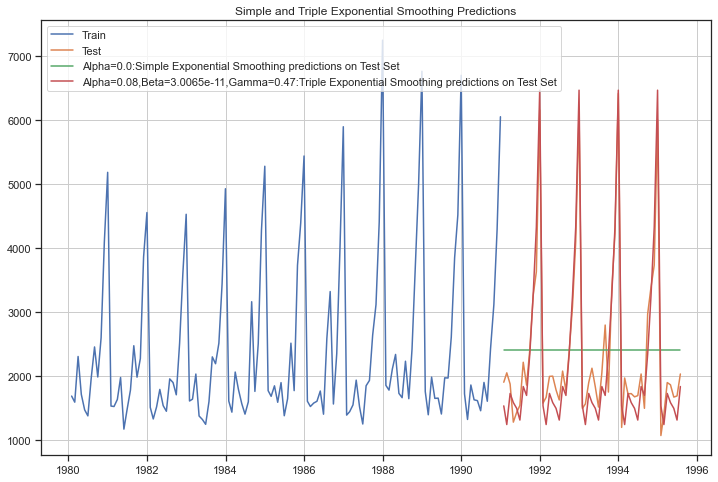

In [71]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Triple Exponential Smoothing Predictions');

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

### Report model accuracy:

In [72]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 362.72396113267996


In [73]:
resultsDf_temp1 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES'])

resultsDf2 = pd.concat([resultsDf1, resultsDf_temp1])
resultsDf2

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961

### ETS(A, A, M) model : Additive trend and multiplicative seasonality:

In [74]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.15421362446566508, 'smoothing_slope': 5.410544943378204e-21, 'smoothing_seasonal': 0.3713170580485947, 'damping_slope': nan, 'initial_level': 1639.999342851796, 'initial_slope': 4.8487922077847365, 'initial_seasons': array([1.00842581, 0.96899203, 1.24180527, 1.13206556, 0.9397928 ,
       0.93810909, 1.22457597, 1.54427652, 1.27335289, 1.63197294,
       2.48291047, 3.11860251]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [75]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1991-01-31    1602.195335
1991-02-28    1373.893219
1991-03-31    1807.444353
1991-04-30    1704.581270
1991-05-31    1602.381922
1991-06-30    1415.486335
1991-07-31    1944.863756
1991-08-31    1910.078649
1991-09-30    2435.206496
1991-10-31    3333.471228
1991-11-30    4407.805837
1991-12-31    6328.573677
1992-01-31    1656.070503
1992-02-29    1419.962443
1992-03-31    1867.882479
1992-04-30    1761.421427
1992-05-31    1655.666122
1992-06-30    1462.425601
1992-07-31    2009.180093
1992-08-31    1973.071052
1992-09-30    2515.296960
1992-10-31    3442.804685
1992-11-30    4551.981986
1992-12-31    6535.014047
1993-01-31    1709.945671
1993-02-28    1466.031668
1993-03-31    1928.320605
1993-04-30    1818.261584
1993-05-31    1708.950323
1993-06-30    1509.364866
1993-07-31    2073.496431
1993-08-31    2036.063456
1993-09-30    2595.387425
1993-10-31    3552.138142
1993-11-30    4696.158135
1993-12-31    6741.454416
1994-01-31    1763.820840
1994-02-28    1512.100892
1994-03-31  

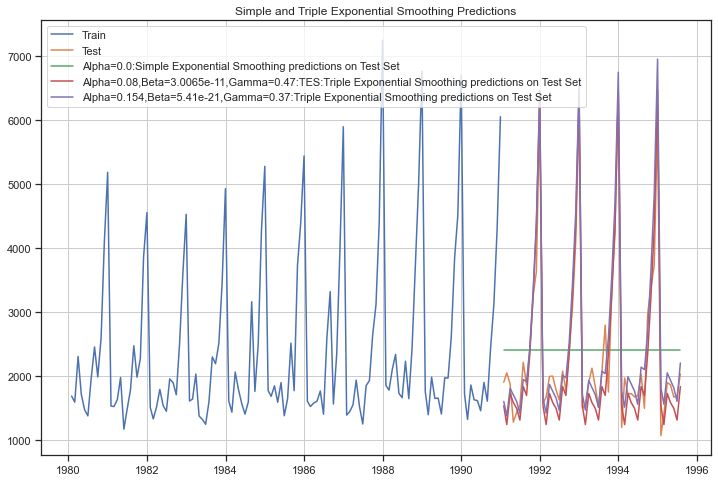

In [76]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.154,Beta=5.41e-21,Gamma=0.37:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Triple Exponential Smoothing Predictions');

### Report model accuracy:

In [77]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 383.18795139581573


In [78]:
resultsDf_temp2 = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES'])

resultsDf3 = pd.concat([resultsDf2, resultsDf_temp2])
resultsDf3

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951

### Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1]

In [79]:
TES_train = train.copy()
TES_test = test.copy()

In [80]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Test RMSE': []})
resultsDf_model

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Test RMSE]
Index: []

In [81]:
model_TES = ExponentialSmoothing(TES_train['Sparkling'],trend='additive',seasonal='additive')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [82]:
from sklearn import metrics

In [83]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_seasonal=k,use_brute = True)
            
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test))
                
            rmse_model6_test_2 = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
                    
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k
                                                  ,'Test RMSE':rmse_model6_test_2}, ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-pac

In [84]:
resultsDf_model

Alpha Values  Beta Values  Gamma Values   Test RMSE
0             0.1          0.1           0.1  326.254946
1             0.1          0.1           0.2  304.315086
2             0.1          0.1           0.3  319.272292
3             0.1          0.1           0.4  351.349581
4             0.1          0.1           0.5  375.403965
..            ...          ...           ...         ...
995           1.0          1.0           0.6  551.768793
996           1.0          1.0           0.7  582.713780
997           1.0          1.0           0.8  657.839605
998           1.0          1.0           0.9  797.753523
999           1.0          1.0           1.0  996.216958

[1000 rows x 4 columns]

In [85]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

Alpha Values  Beta Values  Gamma Values    Test RMSE
91            0.1          1.0           0.2   304.315086
1             0.1          0.1           0.2   304.315086
21            0.1          0.3           0.2   304.315086
61            0.1          0.7           0.2   304.315086
41            0.1          0.5           0.2   304.315086
..            ...          ...           ...          ...
549           0.6          0.5           1.0  1017.126794
509           0.6          0.1           1.0  1017.126794
519           0.6          0.2           1.0  1017.126794
529           0.6          0.3           1.0  1017.126794
559           0.6          0.6           1.0  1017.126794

[1000 rows x 4 columns]

In [86]:
temp_resultsDf3 = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.1,Beta=1.0,Gamma=0.2:TES'])

resultsDf4 = pd.concat([resultsDf3, temp_resultsDf3])
resultsDf4

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086

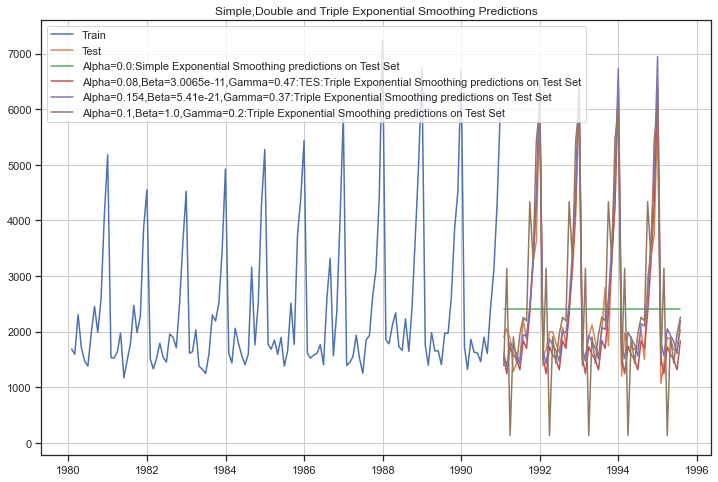

In [87]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.0:Simple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.154,Beta=5.41e-21,Gamma=0.37:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_test['predict',i,j,k], label = 'Alpha=0.1,Beta=1.0,Gamma=0.2:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

### Evaluating most optimum model on the whole data:

In [182]:
# Initializing the Double Exponential Smoothing Model
model_TES_aa = ExponentialSmoothing(df['Sparkling'],trend='additive',seasonal='additive')
# Fitting the model
model_TES_aa = model_TES_aa.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_aa.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.3684210526315789, 'damping_slope': nan, 'initial_level': 1580.0, 'initial_slope': 0.01, 'initial_seasons': array([ 106.,   11.,  724.,  132., -109., -203.,  386.,  873.,  404.,
       1016., 2507., 3599.]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


### Predicting 12 months into the future:

In [188]:
# Forecasting using this model for the duration of the test set
TES_predict_aa =  model_TES_aa.forecast(steps = 12)
TES_predict_aa

1995-08-31    1884.976769
1995-09-30    2402.258496
1995-10-31    3245.977232
1995-11-30    3932.213204
1995-12-31    6119.724082
1996-01-31    1266.116913
1996-02-29    1583.646638
1996-03-31    1821.829048
1996-04-30    1795.729426
1996-05-31    1643.054809
1996-06-30    1576.941975
1996-07-31    1975.093831
Freq: M, dtype: float64

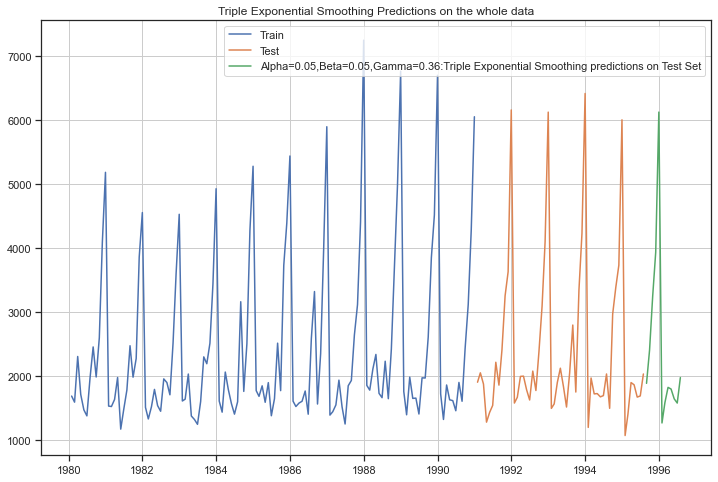

In [189]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_aa, label='Alpha=0.05,Beta=0.05,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions on the whole data');

### Report model accuracy:

In [199]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
rmse = mean_squared_error(df['Sparkling'],model_TES_aa.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 366.563622526104


In [201]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(df['Sparkling'],model_TES_aa.fittedvalues,squared=False)]}
                           ,index=['Alpha=0.05,Beta=0.05,Gamma=0.36:TES 12 months future'])

resultsDf_future_12 = pd.concat([resultsDf4, resultsDf_temp])
resultsDf_future_12

Test RMSE
Alpha=0.0,SES                                       1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES            362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES             383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES                     304.315086
Alpha=0.05,Beta=0.05,Gamma=0.36:TES 12 months f...   366.563623

### Linear Regression model:

In [88]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [89]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [90]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [92]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [93]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

### Model Evaluation using RMSE:

In [94]:
from sklearn import metrics

In [95]:
## Test Data - RMSE

lrmodel_rmse_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(lrmodel_rmse_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [202]:
resultsdf = pd.DataFrame({'Test RMSE': [lrmodel_rmse_test]},index=['RegressionOnTime'])
resultsDf5= pd.concat([resultsDf_future_12, resultsdf])
resultsDf5

Test RMSE
Alpha=0.0,SES                                       1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES            362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES             383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES                     304.315086
Alpha=0.05,Beta=0.05,Gamma=0.36:TES 12 months f...   366.563623
RegressionOnTime                                    1389.135175

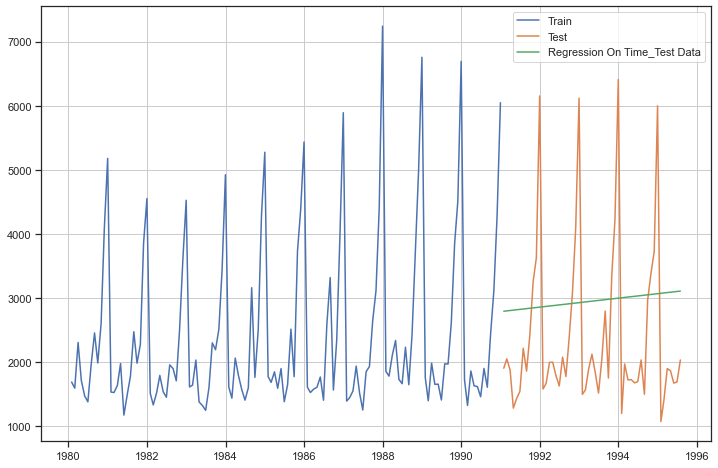

In [97]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Naive approach model:

In [98]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [99]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [100]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

### Model Evaluation using RMSE:

In [101]:
rmse_naivemodel_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_naivemodel_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [102]:
results_naive = pd.DataFrame({'Test RMSE': [rmse_naivemodel_test]},index=['NaiveModel'])

resultsDf6 = pd.concat([resultsDf5, results_naive])
resultsDf6

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352

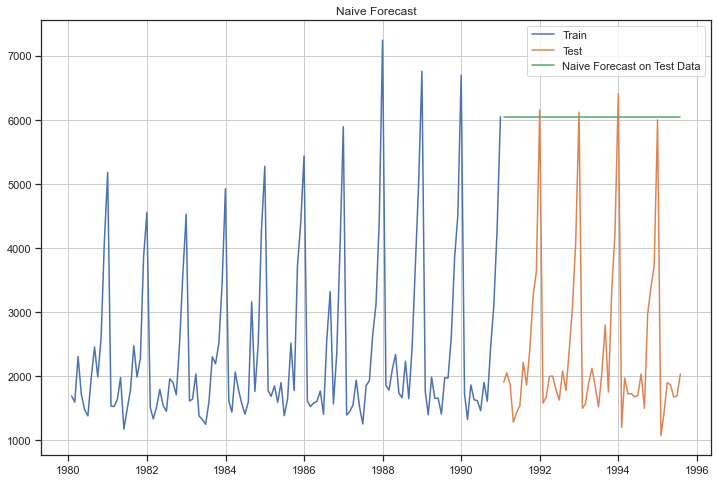

In [103]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Simple Average model:

In [104]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [105]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

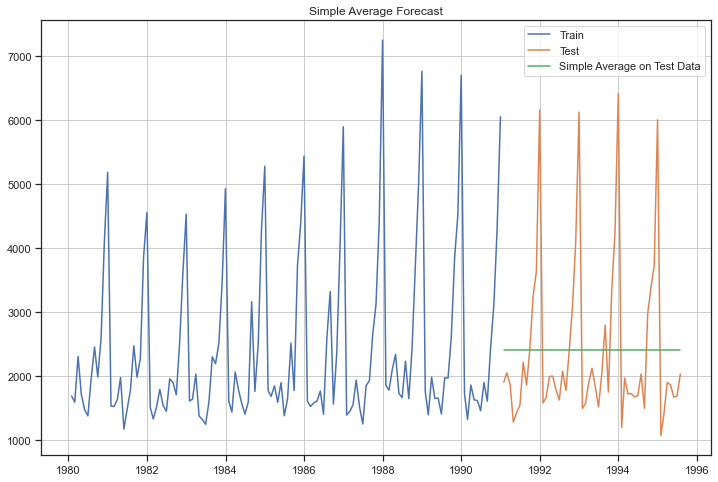

In [106]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model evaluation using RMSE:

In [107]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [108]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf7 = pd.concat([resultsDf6, resultsDf_3])
resultsDf7

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804

### Checking for Stationarity on the train data:

In [110]:
import sklearn
import statsmodels
from statsmodels.tsa.stattools import adfuller

The hypothesis in a simple form for the ADF test is:

𝐻0  : Null hypothesis: The Time Series has a unit root and is thus non-stationary.

𝐻1  : ALternate hypothesis: The Time Series does not have a unit root and is thus stationary.

It is to note that the $\alpha$ value is 0.05

In [111]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.062
DF test p-value is 0.5674110388593658
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [112]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.968
DF test p-value is 8.479210655514148e-11
Number of lags used 11


Plotting the stationary series:

In [113]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

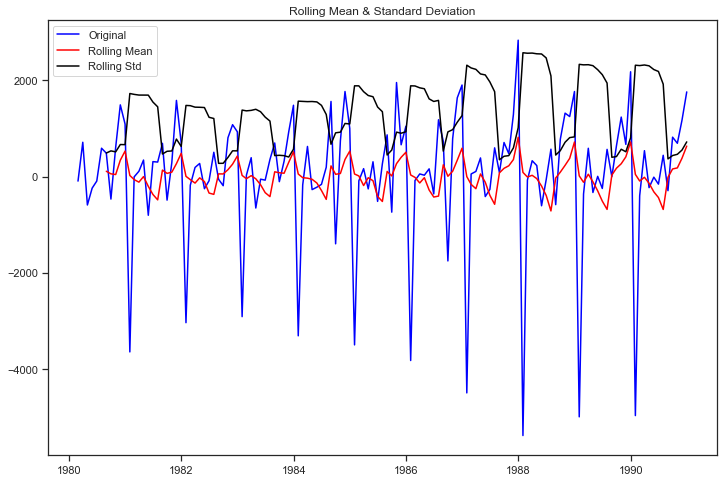

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [114]:
test_stationarity(train['Sparkling'].diff().dropna())

### Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) and for a seasonality as 6:

In [115]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 and 2 as we need to take a difference of the series to make it stationary. The seasonal
## differencing 'D' will be between 0 and 1 to check if it is neeeded or not.

import itertools
p = q = range(0, 4)
d= range(1,3)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 2, 0)(0, 1, 0, 6)
Model: (0, 2, 1)(0, 1, 1, 6)
Model: (0, 2, 2)(0, 1, 2, 6)
Model: (0, 2, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(0, 2, 0, 6)
Model: (1, 1, 1)(0, 2, 1, 6)
Model: (1, 1, 2)(0, 2, 2, 6)
Model: (1, 1, 3)(0, 2, 3, 6)
Model: (1, 2, 0)(1, 0, 0, 6)
Model: (1, 2, 1)(1, 0, 1, 6)
Model: (1, 2, 2)(1, 0, 2, 6)
Model: (1, 2, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(1, 1, 0, 6)
Model: (2, 1, 1)(1, 1, 1, 6)
Model: (2, 1, 2)(1, 1, 2, 6)
Model: (2, 1, 3)(1, 1, 3, 6)
Model: (2, 2, 0)(1, 2, 0, 6)
Model: (2, 2, 1)(1, 2, 1, 6)
Model: (2, 2, 2)(1, 2, 2, 6)
Model: (2, 2, 3)(1, 2, 3, 6)
Model: (3, 1, 0)(2, 0, 0, 6)
Model: (3, 1, 1)(2, 0, 1, 6)
Model: (3, 1, 2)(2, 0, 2, 6)
Model: (3, 1, 3)(2, 0, 3, 6)
Model: (3, 2, 0)(2, 1, 0, 6)
Model: (3, 2, 1)(2, 1, 1, 6)
Model: (3, 2, 2)(2, 1, 2, 6)
Model: (3, 2, 3)(2, 1, 3, 6)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.378076093463
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536914052
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC:1863.784515509464
SARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:2262.9835238897754
SARIMA(0, 1, 0)x(0, 1, 1, 6) - AIC:2018.7784206951897
SARIMA(0, 1, 0)x(0, 1, 2, 6) - AIC:1859.2938416074676
SARIMA(0, 1, 0)x(0, 1, 3, 6) - AIC:1719.4211331387808
SARIMA(0, 1, 0)x(0, 2, 0, 6) - AIC:2315.1026586137164
SARIMA(0, 1, 0)x(0, 2, 1, 6) - AIC:2057.1536051726725


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 2, 2, 6) - AIC:1837.5957065431464
SARIMA(0, 1, 0)x(0, 2, 3, 6) - AIC:1890.1988182196444
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599880181785
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111417923
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC:1803.392909506691
SARIMA(0, 1, 0)x(1, 1, 0, 6) - AIC:1838.4913791966653
SARIMA(0, 1, 0)x(1, 1, 1, 6) - AIC:1825.5404760101399
SARIMA(0, 1, 0)x(1, 1, 2, 6) - AIC:1717.6099198147638
SARIMA(0, 1, 0)x(1, 1, 3, 6) - AIC:1633.4524592080127
SARIMA(0, 1, 0)x(1, 2, 0, 6) - AIC:1831.7324726533539
SARIMA(0, 1, 0)x(1, 2, 1, 6) - AIC:1760.017533749314
SARIMA(0, 1, 0)x(1, 2, 2, 6) - AIC:1662.0246807647088
SARIMA(0, 1, 0)x(1, 2, 3, 6) - AIC:1555.6829038311257
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993618160955
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177806228452
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC:1725.5376430716879
SARIMA(0, 1, 0)x(2, 1, 0, 6) -

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC:1750.6880007148143
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC:1739.449013428358
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC:1725.013928264981
SARIMA(0, 1, 0)x(3, 1, 0, 6) - AIC:1650.1672596141539
SARIMA(0, 1, 0)x(3, 1, 1, 6) - AIC:1649.7725179911165
SARIMA(0, 1, 0)x(3, 1, 2, 6) - AIC:1650.2043642666933
SARIMA(0, 1, 0)x(3, 1, 3, 6) - AIC:1639.0311888701026
SARIMA(0, 1, 0)x(3, 2, 0, 6) - AIC:1597.5847764990874
SARIMA(0, 1, 0)x(3, 2, 1, 6) - AIC:1577.521784828231
SARIMA(0, 1, 0)x(3, 2, 2, 6) - AIC:1581.3076606363413
SARIMA(0, 1, 0)x(3, 2, 3, 6) - AIC:1565.2173113519314
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908977
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.1741580878504
SARIMA(0, 1, 1)x(0, 0, 3, 6) - AIC:1826.528528865847
SARIMA(0, 1, 1)x(0, 1, 0, 6) - AIC:2243.3551441100044
SARIMA(0, 1, 1)x(0, 1, 1, 6) - AIC:1999.5210480233172
SARIMA(0, 1, 1)x(0, 1, 2, 6) - AIC:1831.8220004627037
SARIMA(0, 1, 1)x(0, 1, 3, 6) - AI

SARIMA(0, 1, 3)x(3, 2, 2, 6) - AIC:1531.674409696691
SARIMA(0, 1, 3)x(3, 2, 3, 6) - AIC:1472.6697744263329
SARIMA(0, 2, 0)x(0, 0, 0, 6) - AIC:2341.781510496843
SARIMA(0, 2, 0)x(0, 0, 1, 6) - AIC:2238.50707091393
SARIMA(0, 2, 0)x(0, 0, 2, 6) - AIC:2040.943492182321
SARIMA(0, 2, 0)x(0, 0, 3, 6) - AIC:1941.4432264868776
SARIMA(0, 2, 0)x(0, 1, 0, 6) - AIC:2344.687806981695
SARIMA(0, 2, 0)x(0, 1, 1, 6) - AIC:2099.621888708159
SARIMA(0, 2, 0)x(0, 1, 2, 6) - AIC:1939.5427237726515
SARIMA(0, 2, 0)x(0, 1, 3, 6) - AIC:1797.6021752950244
SARIMA(0, 2, 0)x(0, 2, 0, 6) - AIC:2390.074408656323
SARIMA(0, 2, 0)x(0, 2, 1, 6) - AIC:2193.838285944941
SARIMA(0, 2, 0)x(0, 2, 2, 6) - AIC:1906.990150748077
SARIMA(0, 2, 0)x(0, 2, 3, 6) - AIC:1751.6997729498687
SARIMA(0, 2, 0)x(1, 0, 0, 6) - AIC:2252.909519309694
SARIMA(0, 2, 0)x(1, 0, 1, 6) - AIC:2176.360780015867
SARIMA(0, 2, 0)x(1, 0, 2, 6) - AIC:2018.077860712465
SARIMA(0, 2, 0)x(1, 0, 3, 6) - AIC:1888.066303829523
SARIMA(0, 2, 0)x(1, 1, 0, 6) - AIC:1939.76

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 2, 2)x(1, 2, 2, 6) - AIC:1594.5927118597635
SARIMA(0, 2, 2)x(1, 2, 3, 6) - AIC:1475.4194996394567
SARIMA(0, 2, 2)x(2, 0, 0, 6) - AIC:1803.4620412906079
SARIMA(0, 2, 2)x(2, 0, 1, 6) - AIC:1805.3866662993528
SARIMA(0, 2, 2)x(2, 0, 2, 6) - AIC:1720.166571486088
SARIMA(0, 2, 2)x(2, 0, 3, 6) - AIC:1638.4020194995032
SARIMA(0, 2, 2)x(2, 1, 0, 6) - AIC:1700.2625733768796
SARIMA(0, 2, 2)x(2, 1, 1, 6) - AIC:1699.7723056144198
SARIMA(0, 2, 2)x(2, 1, 2, 6) - AIC:1634.1298013545356
SARIMA(0, 2, 2)x(2, 1, 3, 6) - AIC:1550.5224709744577
SARIMA(0, 2, 2)x(2, 2, 0, 6) - AIC:1679.038496840219
SARIMA(0, 2, 2)x(2, 2, 1, 6) - AIC:1639.1087576824177
SARIMA(0, 2, 2)x(2, 2, 2, 6) - AIC:1590.9659156580037
SARIMA(0, 2, 2)x(2, 2, 3, 6) - AIC:1477.2868334074399
SARIMA(0, 2, 2)x(3, 0, 0, 6) - AIC:1702.8311787242783
SARIMA(0, 2, 2)x(3, 0, 1, 6) - AIC:1706.707098804076
SARIMA(0, 2, 2)x(3, 0, 2, 6) - AIC:1680.8052970615076
SARIMA(0, 2, 2)x(3, 0, 3, 6) - AIC:1640.050609664395
SARIMA(0, 2, 2)x(3, 1, 0, 6) - A

SARIMA(1, 1, 1)x(2, 1, 3, 6) - AIC:1578.9774439155076
SARIMA(1, 1, 1)x(2, 2, 0, 6) - AIC:1664.1795195148925
SARIMA(1, 1, 1)x(2, 2, 1, 6) - AIC:1623.5380864261886
SARIMA(1, 1, 1)x(2, 2, 2, 6) - AIC:1600.252526672813
SARIMA(1, 1, 1)x(2, 2, 3, 6) - AIC:1500.2677665238537
SARIMA(1, 1, 1)x(3, 0, 0, 6) - AIC:1689.9510885244677
SARIMA(1, 1, 1)x(3, 0, 1, 6) - AIC:1686.6000449486964
SARIMA(1, 1, 1)x(3, 0, 2, 6) - AIC:1674.4448987940236
SARIMA(1, 1, 1)x(3, 0, 3, 6) - AIC:1662.6401004186798
SARIMA(1, 1, 1)x(3, 1, 0, 6) - AIC:1591.9031933722765
SARIMA(1, 1, 1)x(3, 1, 1, 6) - AIC:1588.7291470523776
SARIMA(1, 1, 1)x(3, 1, 2, 6) - AIC:1588.396116947756
SARIMA(1, 1, 1)x(3, 1, 3, 6) - AIC:1576.4420292494995
SARIMA(1, 1, 1)x(3, 2, 0, 6) - AIC:1571.4905154200842
SARIMA(1, 1, 1)x(3, 2, 1, 6) - AIC:1523.1171619158204
SARIMA(1, 1, 1)x(3, 2, 2, 6) - AIC:1517.064690752785
SARIMA(1, 1, 1)x(3, 2, 3, 6) - AIC:1502.2479696057205
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:2188.463345041452
SARIMA(1, 1, 2)x(0, 0, 1, 6) - A

SARIMA(1, 2, 0)x(3, 1, 0, 6) - AIC:1689.706009689069
SARIMA(1, 2, 0)x(3, 1, 1, 6) - AIC:1691.7119099949323
SARIMA(1, 2, 0)x(3, 1, 2, 6) - AIC:1686.810842523772
SARIMA(1, 2, 0)x(3, 1, 3, 6) - AIC:1688.1303687865748
SARIMA(1, 2, 0)x(3, 2, 0, 6) - AIC:1630.259634000094
SARIMA(1, 2, 0)x(3, 2, 1, 6) - AIC:1610.498089105071
SARIMA(1, 2, 0)x(3, 2, 2, 6) - AIC:1613.2829781052778
SARIMA(1, 2, 0)x(3, 2, 3, 6) - AIC:1605.4378129749543
SARIMA(1, 2, 1)x(0, 0, 0, 6) - AIC:2226.6095355419066
SARIMA(1, 2, 1)x(0, 0, 1, 6) - AIC:2126.6952023567483
SARIMA(1, 2, 1)x(0, 0, 2, 6) - AIC:1927.820834171404
SARIMA(1, 2, 1)x(0, 0, 3, 6) - AIC:1835.9698694395402
SARIMA(1, 2, 1)x(0, 1, 0, 6) - AIC:2233.8334523880044
SARIMA(1, 2, 1)x(0, 1, 1, 6) - AIC:1995.111245167164
SARIMA(1, 2, 1)x(0, 1, 2, 6) - AIC:1830.0860369228096
SARIMA(1, 2, 1)x(0, 1, 3, 6) - AIC:1694.1796107986747
SARIMA(1, 2, 1)x(0, 2, 0, 6) - AIC:2282.9063462374957
SARIMA(1, 2, 1)x(0, 2, 1, 6) - AIC:2029.1425246814533
SARIMA(1, 2, 1)x(0, 2, 2, 6) - AIC

SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1945.1561426001617
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC:1851.684624084323
SARIMA(2, 1, 0)x(0, 1, 0, 6) - AIC:2236.87063113529
SARIMA(2, 1, 0)x(0, 1, 1, 6) - AIC:2011.3446322598827
SARIMA(2, 1, 0)x(0, 1, 2, 6) - AIC:1844.1413503772073
SARIMA(2, 1, 0)x(0, 1, 3, 6) - AIC:1703.7317365723077
SARIMA(2, 1, 0)x(0, 2, 0, 6) - AIC:2288.1490774289946
SARIMA(2, 1, 0)x(0, 2, 1, 6) - AIC:2050.660367298468
SARIMA(2, 1, 0)x(0, 2, 2, 6) - AIC:1830.7285851848078
SARIMA(2, 1, 0)x(0, 2, 3, 6) - AIC:1670.1818548070257
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:2124.907178671913
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:2054.170077177052
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1915.6336928591113
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC:1791.3157574547572
SARIMA(2, 1, 0)x(1, 1, 0, 6) - AIC:1781.2487561985001
SARIMA(2, 1, 0)x(1, 1, 1, 6) - AIC:1780.4024032898249
SARIMA(2, 1, 0)x(1, 1, 2, 6) - AIC:1687.9709456427358
SARIMA(2, 1, 0)x(1, 1, 3, 6) - AIC:1603.3093267530269
SARIMA(2, 1, 0)x(1, 2, 0, 6) - AIC

SARIMA(2, 1, 3)x(0, 2, 3, 6) - AIC:1621.607495732069
SARIMA(2, 1, 3)x(1, 0, 0, 6) - AIC:2028.7217343951045
SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC:1890.9467035261364
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC:1773.597687340504
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC:1672.265137058057
SARIMA(2, 1, 3)x(1, 1, 0, 6) - AIC:1760.5229106309373
SARIMA(2, 1, 3)x(1, 1, 1, 6) - AIC:1732.18839071472
SARIMA(2, 1, 3)x(1, 1, 2, 6) - AIC:1622.0097802703922
SARIMA(2, 1, 3)x(1, 1, 3, 6) - AIC:1545.772478750876
SARIMA(2, 1, 3)x(1, 2, 0, 6) - AIC:1753.5057465214068
SARIMA(2, 1, 3)x(1, 2, 1, 6) - AIC:1675.149005603309
SARIMA(2, 1, 3)x(1, 2, 2, 6) - AIC:1578.9478195006584
SARIMA(2, 1, 3)x(1, 2, 3, 6) - AIC:1469.0012954730578
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC:1760.7522610947783
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC:1762.6655554401957
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC:1714.5422616890437
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC:1629.1506552624487
SARIMA(2, 1, 3)x(2, 1, 0, 6) - AIC:1675.6083984133302
SARIMA(2, 1, 3)x(2, 1, 1, 6) - AIC:

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 2, 0)x(3, 2, 1, 6) - AIC:1560.2516872729423
SARIMA(2, 2, 0)x(3, 2, 2, 6) - AIC:1554.4289766456739
SARIMA(2, 2, 0)x(3, 2, 3, 6) - AIC:1555.80256531719
SARIMA(2, 2, 1)x(0, 0, 0, 6) - AIC:2216.805305917612
SARIMA(2, 2, 1)x(0, 0, 1, 6) - AIC:2122.7929137068686
SARIMA(2, 2, 1)x(0, 0, 2, 6) - AIC:1919.0364800924674
SARIMA(2, 2, 1)x(0, 0, 3, 6) - AIC:1826.2560303523433
SARIMA(2, 2, 1)x(0, 1, 0, 6) - AIC:2226.5671037511834
SARIMA(2, 2, 1)x(0, 1, 1, 6) - AIC:1988.1217655355529
SARIMA(2, 2, 1)x(0, 1, 2, 6) - AIC:1818.2726873834984
SARIMA(2, 2, 1)x(0, 1, 3, 6) - AIC:1691.8155745359074
SARIMA(2, 2, 1)x(0, 2, 0, 6) - AIC:2275.789014983406
SARIMA(2, 2, 1)x(0, 2, 1, 6) - AIC:2022.8726178546074
SARIMA(2, 2, 1)x(0, 2, 2, 6) - AIC:1805.7920890591063
SARIMA(2, 2, 1)x(0, 2, 3, 6) - AIC:1645.2531226664505
SARIMA(2, 2, 1)x(1, 0, 0, 6) - AIC:2119.7403318730485
SARIMA(2, 2, 1)x(1, 0, 1, 6) - AIC:2044.0514870560123
SARIMA(2, 2, 1)x(1, 0, 2, 6) - AIC:1919.8514582551722
SARIMA(2, 2, 1)x(1, 0, 3, 6) - A

SARIMA(3, 1, 0)x(0, 1, 2, 6) - AIC:1846.1168930321735
SARIMA(3, 1, 0)x(0, 1, 3, 6) - AIC:1705.4658517214898
SARIMA(3, 1, 0)x(0, 2, 0, 6) - AIC:2270.579129185744
SARIMA(3, 1, 0)x(0, 2, 1, 6) - AIC:2051.874039431857
SARIMA(3, 1, 0)x(0, 2, 2, 6) - AIC:1832.0719940203444
SARIMA(3, 1, 0)x(0, 2, 3, 6) - AIC:1672.1818449021591
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC:2102.6673946839833
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC:2026.7285632707178
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC:1908.642319501611
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC:1783.0592424151762
SARIMA(3, 1, 0)x(1, 1, 0, 6) - AIC:1763.2374190457558
SARIMA(3, 1, 0)x(1, 1, 1, 6) - AIC:1763.729320827992
SARIMA(3, 1, 0)x(1, 1, 2, 6) - AIC:1687.517463301456
SARIMA(3, 1, 0)x(1, 1, 3, 6) - AIC:1602.9774146586249
SARIMA(3, 1, 0)x(1, 2, 0, 6) - AIC:1758.2510717740947
SARIMA(3, 1, 0)x(1, 2, 1, 6) - AIC:1701.4378617140042
SARIMA(3, 1, 0)x(1, 2, 2, 6) - AIC:1637.856356197952
SARIMA(3, 1, 0)x(1, 2, 3, 6) - AIC:1530.8346703833638
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC

SARIMA(3, 1, 3)x(1, 0, 3, 6) - AIC:1695.1224188345905


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 1, 0, 6) - AIC:1742.7202656286638
SARIMA(3, 1, 3)x(1, 1, 1, 6) - AIC:1734.1357170206343
SARIMA(3, 1, 3)x(1, 1, 2, 6) - AIC:1624.006063059013
SARIMA(3, 1, 3)x(1, 1, 3, 6) - AIC:1540.9725443330938
SARIMA(3, 1, 3)x(1, 2, 0, 6) - AIC:1779.819450893237
SARIMA(3, 1, 3)x(1, 2, 1, 6) - AIC:1677.0582832501225
SARIMA(3, 1, 3)x(1, 2, 2, 6) - AIC:1579.3552206283036
SARIMA(3, 1, 3)x(1, 2, 3, 6) - AIC:1475.2882720115938
SARIMA(3, 1, 3)x(2, 0, 0, 6) - AIC:1743.3180254730921
SARIMA(3, 1, 3)x(2, 0, 1, 6) - AIC:1745.0629947722666
SARIMA(3, 1, 3)x(2, 0, 2, 6) - AIC:1713.1515388969542
SARIMA(3, 1, 3)x(2, 0, 3, 6) - AIC:1638.9046182266065
SARIMA(3, 1, 3)x(2, 1, 0, 6) - AIC:1664.4579985736177
SARIMA(3, 1, 3)x(2, 1, 1, 6) - AIC:1708.0749234553225
SARIMA(3, 1, 3)x(2, 1, 2, 6) - AIC:1634.720934568921
SARIMA(3, 1, 3)x(2, 1, 3, 6) - AIC:1550.554126909524
SARIMA(3, 1, 3)x(2, 2, 0, 6) - AIC:1630.983370639264
SARIMA(3, 1, 3)x(2, 2, 1, 6) - AIC:1596.4797987633283
SARIMA(3, 1, 3)x(2, 2, 2, 6) - AI

SARIMA(3, 2, 2)x(2, 0, 1, 6) - AIC:1744.8695869321596
SARIMA(3, 2, 2)x(2, 0, 2, 6) - AIC:1724.5936651250722
SARIMA(3, 2, 2)x(2, 0, 3, 6) - AIC:1656.8890614324062
SARIMA(3, 2, 2)x(2, 1, 0, 6) - AIC:1653.9238675202894
SARIMA(3, 2, 2)x(2, 1, 1, 6) - AIC:1658.6627194716157
SARIMA(3, 2, 2)x(2, 1, 2, 6) - AIC:1654.9482936885631
SARIMA(3, 2, 2)x(2, 1, 3, 6) - AIC:1553.738438785961
SARIMA(3, 2, 2)x(2, 2, 0, 6) - AIC:1643.2854052803316
SARIMA(3, 2, 2)x(2, 2, 1, 6) - AIC:1591.128165297684
SARIMA(3, 2, 2)x(2, 2, 2, 6) - AIC:1590.8311631288202
SARIMA(3, 2, 2)x(2, 2, 3, 6) - AIC:1508.8269564638294
SARIMA(3, 2, 2)x(3, 0, 0, 6) - AIC:1658.485777215141
SARIMA(3, 2, 2)x(3, 0, 1, 6) - AIC:1654.1804707503443
SARIMA(3, 2, 2)x(3, 0, 2, 6) - AIC:1657.9207279241327
SARIMA(3, 2, 2)x(3, 0, 3, 6) - AIC:1643.8164605283325
SARIMA(3, 2, 2)x(3, 1, 0, 6) - AIC:1558.4662945541693
SARIMA(3, 2, 2)x(3, 1, 1, 6) - AIC:1555.771936225859
SARIMA(3, 2, 2)x(3, 1, 2, 6) - AIC:1558.1367443618167
SARIMA(3, 2, 2)x(3, 1, 3, 6) - A

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
743   (1, 2, 3)  (1, 2, 3, 6)  1459.792521
1127  (2, 2, 3)  (1, 2, 3, 6)  1461.654119
1511  (3, 2, 3)  (1, 2, 3, 6)  1462.945879
371   (0, 2, 3)  (2, 2, 3, 6)  1463.886918
1535  (3, 2, 3)  (3, 2, 3, 6)  1465.635544

In [119]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(1, 2, 3),
                                seasonal_order=(1, 2, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 2, 3)x(1, 2, 3, 6)   Log Likelihood                -720.896
Date:                           Tue, 18 May 2021   AIC                           1459.793
Time:                                   05:53:38   BIC                           1482.872
Sample:                               01-31-1980   HQIC                          1469.121
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5968      0.255     -2.340      0.019      -1.097      -0.097
ma.L1         -0.6433      1.826     -0.352

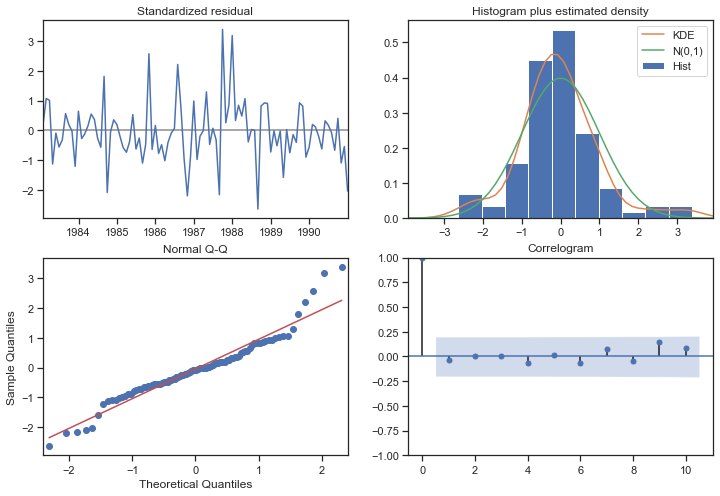

In [120]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model :

In [121]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [122]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1181.064741  405.562895     386.176072    1975.953409
1991-02-28   919.156984  417.817833     100.249080    1738.064888
1991-03-31  1505.170855  417.337603     687.204183    2323.137527
1991-04-30  1368.225763  422.188088     540.752316    2195.699211
1991-05-31  1093.459951  422.848013     264.693075    1922.226827

In [123]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 2183.422671366298


In [124]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(1,2,3)(1,2,3,6)'])


resultsDf8 = pd.concat([resultsDf7,temp_resultsDf])

resultsDf8

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
SARIMA(1,2,3)(1,2,3,6)                     2183.422671

### ACF and PACF on the time series data:

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

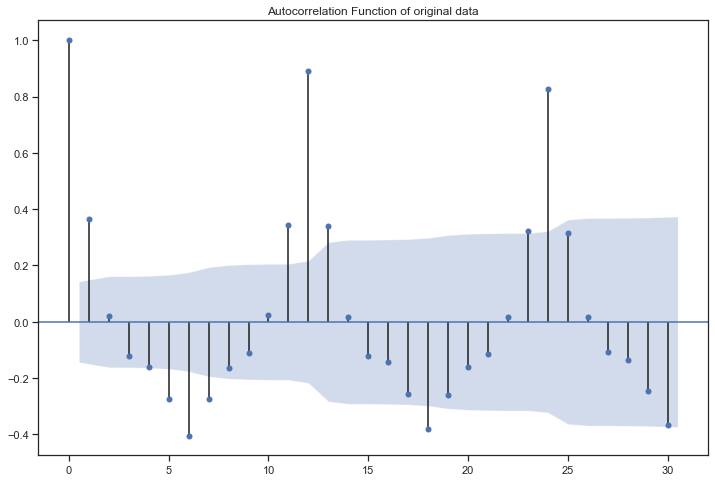

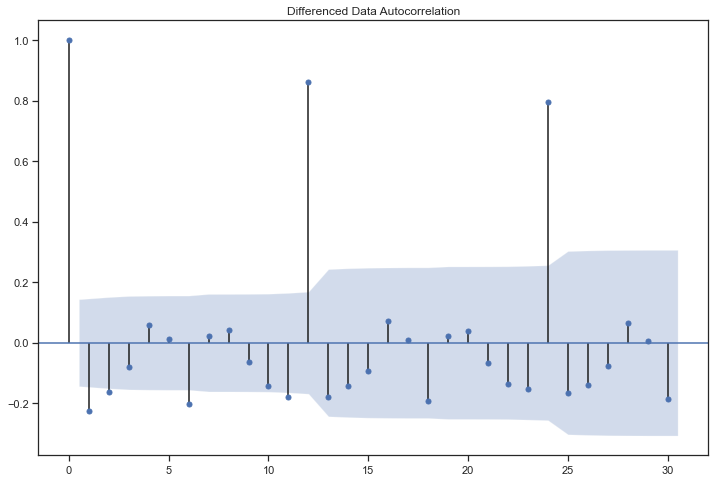

In [126]:
plot_acf(df['Sparkling'],lags=30, title = 'Autocorrelation Function of original data')
plot_acf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


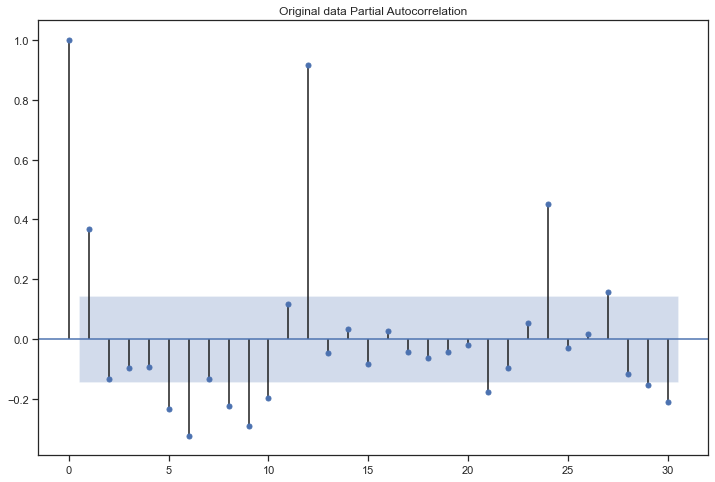

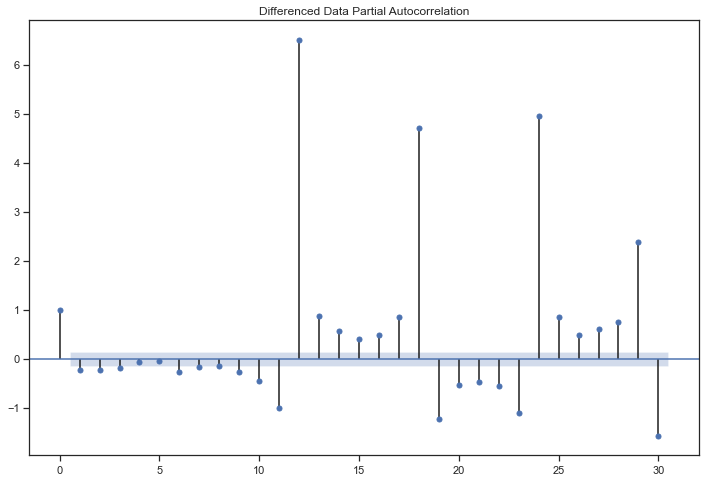

In [127]:
plot_pacf(df['Sparkling'],lags=30, title = 'Original data Partial Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

By looking at the above plots, we can say the following:

1. The ACF plot cuts off at lag 2. i.e. The Moving-Average parameter in an ARIMA model, q = 2
2. The PACF plot cuts off at lag 3. i.e. The Auto-Regressive parameter in an ARIMA mode, p = 4
3. We can also see there is a seasonality present and can be considered as either 6 or 12.

Let us plot the original data and the differenced series:

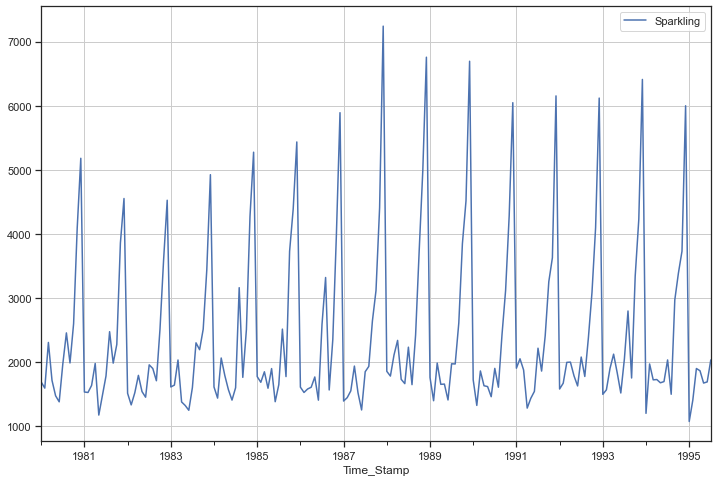

In [128]:
df.plot()
plt.grid();

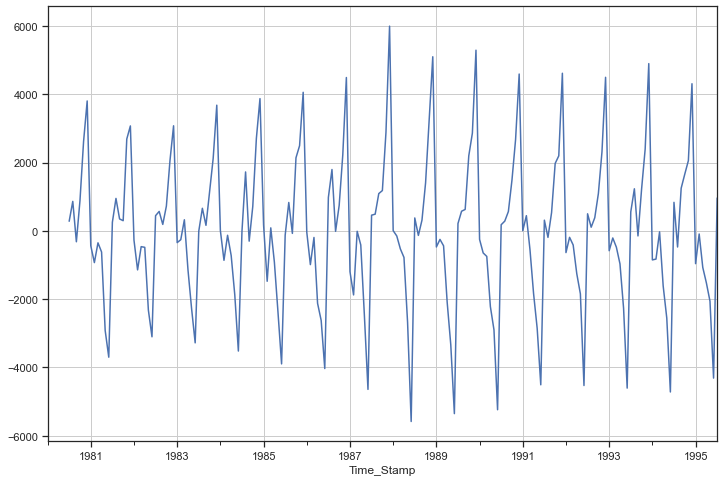

In [129]:
# in the above plot, we can see there is both trend and seasonality:
# Let us take a seasonal differencing and look at the series:

(df['Sparkling'].diff(6)).plot()
plt.grid();

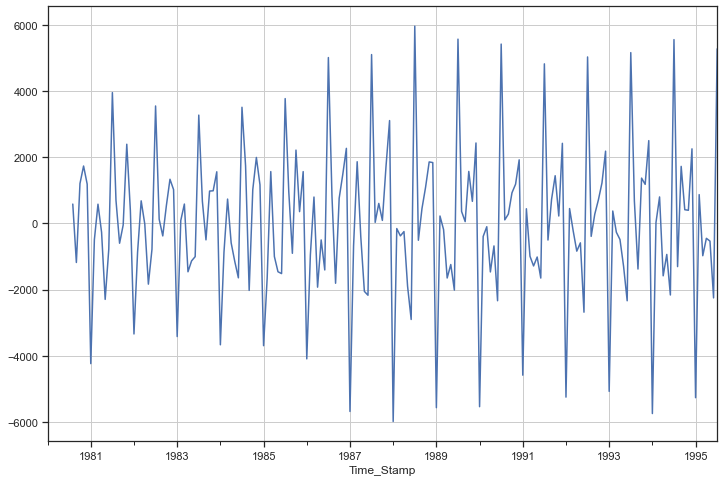

In [130]:
# We can see there is a slight trend present in the data:
# So we take a differencing of first order on the seasonally differenced series.

(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

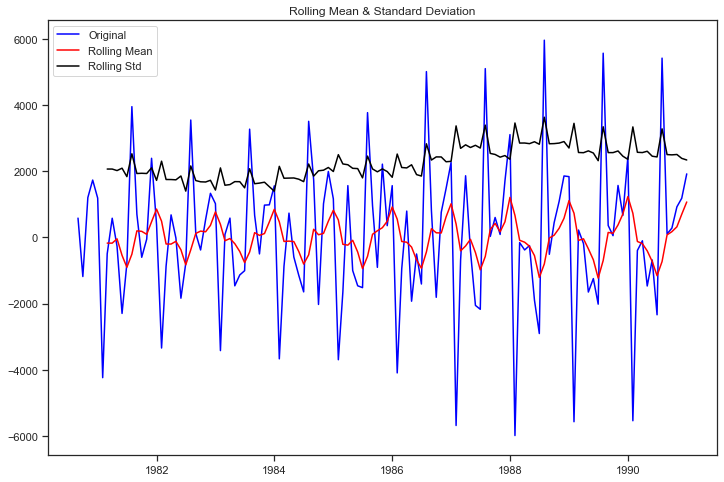

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [131]:
### Checking for the stationarity of the above series:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


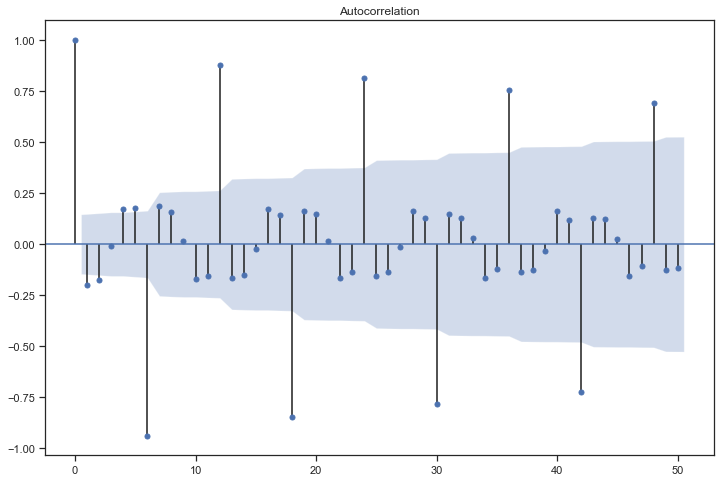

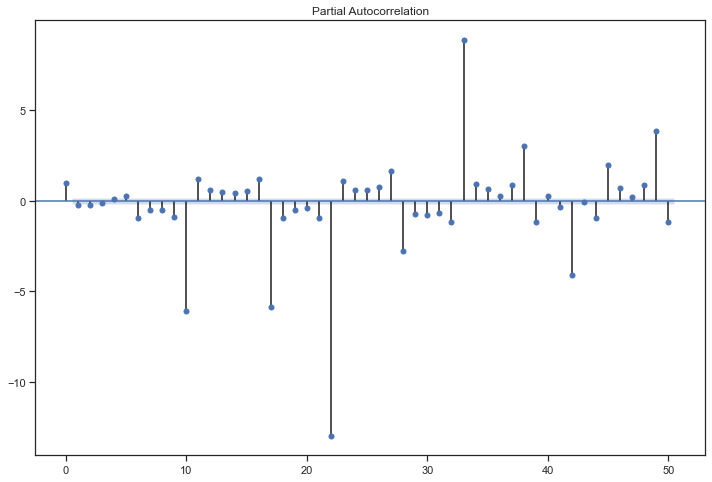

In [132]:
# Checking the new ACF and PACF plots for the new modified time series:

plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=50)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=50);

In [ ]:
# Here both P and Q are taken as 2 as the differenced data ACF and PACF plots indicate the same. 
# Seasonal differencing is taken as 2
# q = 2 and p = 3 and d as 1

In [136]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3,1,2),
                                seasonal_order=(2, 2, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(2, 2, 2, 6)   Log Likelihood                -785.758
Date:                           Tue, 18 May 2021   AIC                           1591.515
Time:                                   06:15:57   BIC                           1617.959
Sample:                               01-31-1980   HQIC                          1602.229
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9249      0.242      3.828      0.000       0.451       1.398
ar.L2         -0.2182      0.155     -1.406

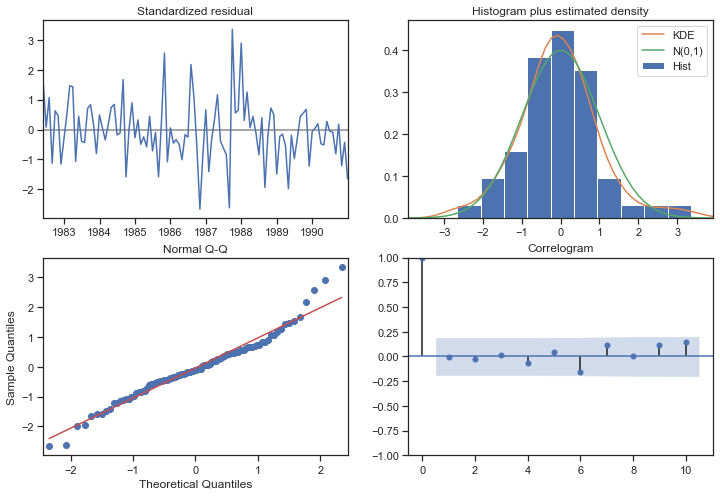

In [137]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model

In [138]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [139]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('RMSE:',rmse)

RMSE: 1004.2949890854476


In [140]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(3,1,2)(2,2,2,6)'])


resultsDf9 = pd.concat([resultsDf8,temp_resultsDf])

resultsDf9

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
SARIMA(1,2,3)(1,2,3,6)                     2183.422671
SARIMA(3,1,2)(2,2,2,6)                     1004.294989

### Automated version of an SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC) and for a seasonality as 12:

In [141]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0,1,2,3.
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary. The seasonal
## differencing 'D' will be between 0,1and 2.

import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,3)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 3)(0, 1, 3, 12)
Model: (2, 1, 0)(0, 2, 0, 12)
Model: (2, 1, 1)(0, 2, 1, 12)
Model: (2, 1, 2)(0, 2, 2, 12)
Model: (2, 1, 3)(0, 2, 3, 12)
Model: (3, 1, 0)(1, 0, 0, 12)
Model: (3, 1, 1)(1, 0, 1, 12)
Model: (3, 1, 2)(1, 0, 2, 12)
Model: (3, 1, 3)(1, 0, 3, 12)


In [142]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [143]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.261461684226
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640239813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:2226.7471918142546
SARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:1822.982485206384
SARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1626.8626334545004
SARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC:1452.6773574277793


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(0, 1, 3, 12) - AIC:6104.647685388771
SARIMA(0, 1, 0)x(0, 2, 0, 12) - AIC:1746.5675098727672
SARIMA(0, 1, 0)x(0, 2, 1, 12) - AIC:1479.2017406799062
SARIMA(0, 1, 0)x(0, 2, 2, 12) - AIC:1283.8460984582468


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


SARIMA(0, 1, 0)x(0, 2, 3, 12) - AIC:1101.1741539697823
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301372166
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.210873594051


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:2082.65419428488
SARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:1646.3778167661442
SARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1628.3243908893419
SARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC:1454.5289621898435
SARIMA(0, 1, 0)x(1, 1, 3, 12) - AIC:6122.822239075646
SARIMA(0, 1, 0)x(1, 2, 0, 12) - AIC:1531.3718536941249
SARIMA(0, 1, 0)x(1, 2, 1, 12) - AIC:1472.409584123387
SARIMA(0, 1, 0)x(1, 2, 2, 12) - AIC:1285.831119929451
SARIMA(0, 1, 0)x(1, 2, 3, 12) - AIC:1100.1995427317352
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054160641735
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898054509456


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:2503.3789548496343
SARIMA(0, 1, 0)x(2, 1, 0, 12) - AIC:1466.6211360755017
SARIMA(0, 1, 0)x(2, 1, 1, 12) - AIC:1468.5000981881103
SARIMA(0, 1, 0)x(2, 1, 2, 12) - AIC:1456.0729761858415


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(2, 1, 3, 12) - AIC:2092.4142257977
SARIMA(0, 1, 0)x(2, 2, 0, 12) - AIC:1324.8823141662335
SARIMA(0, 1, 0)x(2, 2, 1, 12) - AIC:1299.8821476061032
SARIMA(0, 1, 0)x(2, 2, 2, 12) - AIC:1286.0758949957885
SARIMA(0, 1, 0)x(2, 2, 3, 12) - AIC:1102.1514999186177
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:1467.45740953084
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:1469.1871061582767
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:1471.05945316298


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3541.9939383560786
SARIMA(0, 1, 0)x(3, 1, 0, 12) - AIC:1289.239819743992
SARIMA(0, 1, 0)x(3, 1, 1, 12) - AIC:1291.2448877994063
SARIMA(0, 1, 0)x(3, 1, 2, 12) - AIC:1289.1183220608052


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 0)x(3, 1, 3, 12) - AIC:6002.743002180379
SARIMA(0, 1, 0)x(3, 2, 0, 12) - AIC:1127.128616543866
SARIMA(0, 1, 0)x(3, 2, 1, 12) - AIC:1113.919410522542
SARIMA(0, 1, 0)x(3, 2, 2, 12) - AIC:1116.806551665002
SARIMA(0, 1, 0)x(3, 2, 3, 12) - AIC:1099.3367535040154
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649611646
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957271141


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3886.7680506035354
SARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:1760.6565719765836
SARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1569.663923422531
SARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC:1399.1083846728561


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 1)x(0, 2, 0, 12) - AIC:1696.59992745171
SARIMA(0, 1, 1)x(0, 2, 1, 12) - AIC:1430.6640015945218
SARIMA(0, 1, 1)x(0, 2, 2, 12) - AIC:1237.338348061804
SARIMA(0, 1, 1)x(0, 2, 3, 12) - AIC:1060.5947056887005
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881790301
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0973022313528
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319658893062


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:nan
SARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:1602.859481891327
SARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:1570.8550259097035
SARIMA(0, 1, 1)x(1, 1, 2, 12) - AIC:1400.6709524024416


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(1, 1, 3, 12) - AIC:6244.414325119702
SARIMA(0, 1, 1)x(1, 2, 0, 12) - AIC:1494.4195109523855
SARIMA(0, 1, 1)x(1, 2, 1, 12) - AIC:1417.719090836863
SARIMA(0, 1, 1)x(1, 2, 2, 12) - AIC:1238.2175900491868
SARIMA(0, 1, 1)x(1, 2, 3, 12) - AIC:1060.5581612547971
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.675195455015
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245086525295
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.3683740088181


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3327.4880809903293
SARIMA(0, 1, 1)x(2, 1, 0, 12) - AIC:1428.2448787539215
SARIMA(0, 1, 1)x(2, 1, 1, 12) - AIC:1429.6168027455058
SARIMA(0, 1, 1)x(2, 1, 2, 12) - AIC:1402.6385889589137
SARIMA(0, 1, 1)x(2, 1, 3, 12) - AIC:6482.336296074696
SARIMA(0, 1, 1)x(2, 2, 0, 12) - AIC:1294.446480010005
SARIMA(0, 1, 1)x(2, 2, 1, 12) - AIC:1267.9708447179391
SARIMA(0, 1, 1)x(2, 2, 2, 12) - AIC:1238.4495915369218
SARIMA(0, 1, 1)x(2, 2, 3, 12) - AIC:1062.018148834239
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:1428.4607679805247
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:1428.9081544766073
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:1429.5891891118563


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3390.6811467952066
SARIMA(0, 1, 1)x(3, 1, 0, 12) - AIC:1255.5784542706924
SARIMA(0, 1, 1)x(3, 1, 1, 12) - AIC:1257.4558584682975
SARIMA(0, 1, 1)x(3, 1, 2, 12) - AIC:1258.2925129664782


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 1)x(3, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 1)x(3, 2, 0, 12) - AIC:1099.3223375082182
SARIMA(0, 1, 1)x(3, 2, 1, 12) - AIC:1087.7844036516622
SARIMA(0, 1, 1)x(3, 2, 2, 12) - AIC:1089.7671305638457
SARIMA(0, 1, 1)x(3, 2, 3, 12) - AIC:1062.2664791101834
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410102201027
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.289761882914
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1657.6640310348355


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:4125.495450739962
SARIMA(0, 1, 2)x(0, 1, 0, 12) - AIC:1741.3207220130453
SARIMA(0, 1, 2)x(0, 1, 1, 12) - AIC:1554.7429039119456
SARIMA(0, 1, 2)x(0, 1, 2, 12) - AIC:1382.4842541088065


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 2)x(0, 2, 0, 12) - AIC:1669.9279788459953
SARIMA(0, 1, 2)x(0, 2, 1, 12) - AIC:1410.5957442825934
SARIMA(0, 1, 2)x(0, 2, 2, 12) - AIC:1224.1249612250936
SARIMA(0, 1, 2)x(0, 2, 3, 12) - AIC:1047.2884966006598
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332200636
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1667400135193
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1603192650061


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:2453.712736137221
SARIMA(0, 1, 2)x(1, 1, 0, 12) - AIC:1601.7587296245922
SARIMA(0, 1, 2)x(1, 1, 1, 12) - AIC:1556.155971614629
SARIMA(0, 1, 2)x(1, 1, 2, 12) - AIC:1384.398867205401
SARIMA(0, 1, 2)x(1, 1, 3, 12) - AIC:6161.16472153261
SARIMA(0, 1, 2)x(1, 2, 0, 12) - AIC:1490.6431788726122
SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:1401.7409678208567
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:1225.1243359184712
SARIMA(0, 1, 2)x(1, 2, 3, 12) - AIC:1047.0005602707322
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774455084
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438802492406
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215637209789


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:3585.7550106321455
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:1427.0773424745303
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:1428.553476781365
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:1386.0237322644075
SARIMA(0, 1, 2)x(2, 1, 3, 12) - AIC:6226.905588909011
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:1293.0189064543565
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:1268.93080640996
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:1225.1500271803066
SARIMA(0, 1, 2)x(2, 2, 3, 12) - AIC:1048.5239448276348
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:1428.5993408129282
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:1429.7448370652037
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:1430.6881718295838


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:3646.7742960507717
SARIMA(0, 1, 2)x(3, 1, 0, 12) - AIC:1254.652558100454
SARIMA(0, 1, 2)x(3, 1, 1, 12) - AIC:1256.5625397358149
SARIMA(0, 1, 2)x(3, 1, 2, 12) - AIC:1257.4253277653022


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 2)x(3, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 2)x(3, 2, 0, 12) - AIC:1099.4692817667888
SARIMA(0, 1, 2)x(3, 2, 1, 12) - AIC:1088.4859450679207
SARIMA(0, 1, 2)x(3, 2, 2, 12) - AIC:1090.4747514159885
SARIMA(0, 1, 2)x(3, 2, 3, 12) - AIC:1048.6862832835925
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:2168.0925408690523
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:1873.9770672933641
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:1643.297366260695
SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:9441.504844731886
SARIMA(0, 1, 3)x(0, 1, 0, 12) - AIC:1727.2607382322146
SARIMA(0, 1, 3)x(0, 1, 1, 12) - AIC:1540.7948185902487
SARIMA(0, 1, 3)x(0, 1, 2, 12) - AIC:1369.9603670882545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(0, 2, 0, 12) - AIC:1652.3193540383131
SARIMA(0, 1, 3)x(0, 2, 1, 12) - AIC:1395.9586523947605
SARIMA(0, 1, 3)x(0, 2, 2, 12) - AIC:1211.208189721643
SARIMA(0, 1, 3)x(0, 2, 3, 12) - AIC:1034.4728564543173
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:1792.0308172015718
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:1710.6404080345121
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:1542.7317197173822


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:6587.63160310562
SARIMA(0, 1, 3)x(1, 1, 0, 12) - AIC:1602.1924102854598
SARIMA(0, 1, 3)x(1, 1, 1, 12) - AIC:1542.681454561485
SARIMA(0, 1, 3)x(1, 1, 2, 12) - AIC:1371.7363271082888
SARIMA(0, 1, 3)x(1, 1, 3, 12) - AIC:6297.779104397999
SARIMA(0, 1, 3)x(1, 2, 0, 12) - AIC:1490.8253105521019
SARIMA(0, 1, 3)x(1, 2, 1, 12) - AIC:1387.4709959371799
SARIMA(0, 1, 3)x(1, 2, 2, 12) - AIC:1212.1508821843115
SARIMA(0, 1, 3)x(1, 2, 3, 12) - AIC:1034.2052490143424
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:1604.5715807849149
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:1601.0681761310827
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:1543.0486198942867


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:1977.386594250936
SARIMA(0, 1, 3)x(2, 1, 0, 12) - AIC:1428.3896912978475
SARIMA(0, 1, 3)x(2, 1, 1, 12) - AIC:1429.826518069719
SARIMA(0, 1, 3)x(2, 1, 2, 12) - AIC:1373.4524741735436
SARIMA(0, 1, 3)x(2, 1, 3, 12) - AIC:6147.702264868008
SARIMA(0, 1, 3)x(2, 2, 0, 12) - AIC:1294.0748665807175
SARIMA(0, 1, 3)x(2, 2, 1, 12) - AIC:1269.6852787977557
SARIMA(0, 1, 3)x(2, 2, 2, 12) - AIC:1212.0028756985841
SARIMA(0, 1, 3)x(2, 2, 3, 12) - AIC:1035.7129318546783
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:1429.6529432924021
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:1441.1435184587847
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:1431.0415229640407


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:1947.1932431324312
SARIMA(0, 1, 3)x(3, 1, 0, 12) - AIC:1256.0020283364686
SARIMA(0, 1, 3)x(3, 1, 1, 12) - AIC:1258.0747613245605
SARIMA(0, 1, 3)x(3, 1, 2, 12) - AIC:1258.9452630543842


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(0, 1, 3)x(3, 1, 3, 12) - AIC:nan
SARIMA(0, 1, 3)x(3, 2, 0, 12) - AIC:1101.0174702463908
SARIMA(0, 1, 3)x(3, 2, 1, 12) - AIC:1089.414019104678
SARIMA(0, 1, 3)x(3, 2, 2, 12) - AIC:1091.4110978883311
SARIMA(0, 1, 3)x(3, 2, 3, 12) - AIC:1035.3795587937557
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.393833993082
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476313344


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3078.390669760228
SARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:1810.9513015567375
SARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1613.7407033427344
SARIMA(1, 1, 0)x(0, 1, 2, 12) - AIC:1441.4259994294664


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 0)x(0, 2, 0, 12) - AIC:1741.1931203775744
SARIMA(1, 1, 0)x(0, 2, 1, 12) - AIC:1473.0544263368154
SARIMA(1, 1, 0)x(0, 2, 2, 12) - AIC:1273.0926119750332
SARIMA(1, 1, 0)x(0, 2, 3, 12) - AIC:1093.674415207867
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279327689
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592980723
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.489440291236


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:1478.4768570502085
SARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:1619.670336331686
SARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1615.7404485320906
SARIMA(1, 1, 0)x(1, 1, 2, 12) - AIC:1443.1035529242472
SARIMA(1, 1, 0)x(1, 1, 3, 12) - AIC:6333.222364006072
SARIMA(1, 1, 0)x(1, 2, 0, 12) - AIC:1508.7236211788713
SARIMA(1, 1, 0)x(1, 2, 1, 12) - AIC:1461.1487884260944
SARIMA(1, 1, 0)x(1, 2, 2, 12) - AIC:1274.8756657652655
SARIMA(1, 1, 0)x(1, 2, 3, 12) - AIC:1091.4980126448615
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080428295
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.1356135594483
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412082306368


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:2519.833409807275
SARIMA(1, 1, 0)x(2, 1, 0, 12) - AIC:1440.5741627700602
SARIMA(1, 1, 0)x(2, 1, 1, 12) - AIC:1442.5059371040693
SARIMA(1, 1, 0)x(2, 1, 2, 12) - AIC:1444.427424625891
SARIMA(1, 1, 0)x(2, 1, 3, 12) - AIC:6284.6792560097465
SARIMA(1, 1, 0)x(2, 2, 0, 12) - AIC:1300.5093120241568
SARIMA(1, 1, 0)x(2, 2, 1, 12) - AIC:1274.3061280040242
SARIMA(1, 1, 0)x(2, 2, 2, 12) - AIC:1275.4163412933503
SARIMA(1, 1, 0)x(2, 2, 3, 12) - AIC:1094.1210812996774
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:1440.5134643055892
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:1442.1719780529963
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:1443.7660405117429


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:2583.2184706454727
SARIMA(1, 1, 0)x(3, 1, 0, 12) - AIC:1265.1747644628445
SARIMA(1, 1, 0)x(3, 1, 1, 12) - AIC:1267.1592029950452
SARIMA(1, 1, 0)x(3, 1, 2, 12) - AIC:1263.9849698542814


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 0)x(3, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 0)x(3, 2, 0, 12) - AIC:1103.3565846595882
SARIMA(1, 1, 0)x(3, 2, 1, 12) - AIC:1091.5650136673853
SARIMA(1, 1, 0)x(3, 2, 2, 12) - AIC:1093.483034539376
SARIMA(1, 1, 0)x(3, 2, 3, 12) - AIC:1090.1123317186275
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.9340491981875
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.3558979011582
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981353044117


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:1959.6740655507583
SARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:1757.3654162999665
SARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1569.3827366903495
SARIMA(1, 1, 1)x(0, 1, 2, 12) - AIC:1398.7561673552188


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(0, 2, 0, 12) - AIC:1688.5923056641525
SARIMA(1, 1, 1)x(0, 2, 1, 12) - AIC:1428.6207532392673
SARIMA(1, 1, 1)x(0, 2, 2, 12) - AIC:1238.5463303372605
SARIMA(1, 1, 1)x(0, 2, 3, 12) - AIC:1061.5593009103059
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466410167
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.5403444780668
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248864639163


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:1588.065567303865
SARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1570.6724639920058
SARIMA(1, 1, 1)x(1, 1, 2, 12) - AIC:1400.4523888694075


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(1, 1, 3, 12) - AIC:6245.786134399489
SARIMA(1, 1, 1)x(1, 2, 0, 12) - AIC:1477.4048811721934
SARIMA(1, 1, 1)x(1, 2, 1, 12) - AIC:1418.609434828949
SARIMA(1, 1, 1)x(1, 2, 2, 12) - AIC:1239.5909409537214
SARIMA(1, 1, 1)x(1, 2, 3, 12) - AIC:1061.619815247633
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.616160707642
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.314223590532
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.806996911472


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:1512.6196658657211
SARIMA(1, 1, 1)x(2, 1, 0, 12) - AIC:1413.567985973143
SARIMA(1, 1, 1)x(2, 1, 1, 12) - AIC:1414.8736681475684
SARIMA(1, 1, 1)x(2, 1, 2, 12) - AIC:1402.2732672889813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(2, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(2, 2, 0, 12) - AIC:1278.927473826233
SARIMA(1, 1, 1)x(2, 2, 1, 12) - AIC:1254.2575952396915
SARIMA(1, 1, 1)x(2, 2, 2, 12) - AIC:1239.8645004880807
SARIMA(1, 1, 1)x(2, 2, 3, 12) - AIC:1062.946834965368
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:1414.9112075294647
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:1415.9502480228796
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:1445.7761222617146


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:2813.7603641338087
SARIMA(1, 1, 1)x(3, 1, 0, 12) - AIC:1240.827554502813
SARIMA(1, 1, 1)x(3, 1, 1, 12) - AIC:1242.6640990292358
SARIMA(1, 1, 1)x(3, 1, 2, 12) - AIC:1243.114500558956


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 1)x(3, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 1)x(3, 2, 0, 12) - AIC:1084.9869463902476
SARIMA(1, 1, 1)x(3, 2, 1, 12) - AIC:1074.1993388798576
SARIMA(1, 1, 1)x(3, 2, 2, 12) - AIC:1076.1677715086905
SARIMA(1, 1, 1)x(3, 2, 3, 12) - AIC:1063.3507604875174
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.463345041452
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708321667913
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.629142252533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:4489.773350214097
SARIMA(1, 1, 2)x(0, 1, 0, 12) - AIC:1742.7366275429154
SARIMA(1, 1, 2)x(0, 1, 1, 12) - AIC:1554.9584137775244
SARIMA(1, 1, 2)x(0, 1, 2, 12) - AIC:1382.347780060985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 2)x(0, 2, 0, 12) - AIC:1670.684405241037
SARIMA(1, 1, 2)x(0, 2, 1, 12) - AIC:1409.1081800295271
SARIMA(1, 1, 2)x(0, 2, 2, 12) - AIC:1224.7162920642545
SARIMA(1, 1, 2)x(0, 2, 3, 12) - AIC:1048.090744637632
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799331984
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793896405
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.5842474732294
SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:7516.581995013655
SARIMA(1, 1, 2)x(1, 1, 0, 12) - AIC:1585.7860900946905
SARIMA(1, 1, 2)x(1, 1, 1, 12) - AIC:1556.1300442364998
SARIMA(1, 1, 2)x(1, 1, 2, 12) - AIC:1384.1378736571958
SARIMA(1, 1, 2)x(1, 1, 3, 12) - AIC:6668.093877117053
SARIMA(1, 1, 2)x(1, 2, 0, 12) - AIC:1474.6371580517364
SARIMA(1, 1, 2)x(1, 2, 1, 12) - AIC:1400.4264913674326
SARIMA(1, 1, 2)x(1, 2, 2, 12) - AIC:1225.6492432657544
SARIMA(1, 1, 2)x(1, 2, 3, 12) - AIC:1047.2945907335306
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216932347026
SARIMA(1, 1, 2)x(2, 0, 1, 12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3941.371913869206
SARIMA(1, 1, 2)x(2, 1, 0, 12) - AIC:1411.9924109200235
SARIMA(1, 1, 2)x(2, 1, 1, 12) - AIC:1413.5918214503017
SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:1385.688719967751
SARIMA(1, 1, 2)x(2, 1, 3, 12) - AIC:6226.446931730715
SARIMA(1, 1, 2)x(2, 2, 0, 12) - AIC:1276.1418604252342
SARIMA(1, 1, 2)x(2, 2, 1, 12) - AIC:1253.8176002300486
SARIMA(1, 1, 2)x(2, 2, 2, 12) - AIC:1225.5432261768187
SARIMA(1, 1, 2)x(2, 2, 3, 12) - AIC:1048.7958609290238
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:1413.8073498227118
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:1414.913528548075
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:1415.9977692493292


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:4004.194072060561
SARIMA(1, 1, 2)x(3, 1, 0, 12) - AIC:1240.4397941534369
SARIMA(1, 1, 2)x(3, 1, 1, 12) - AIC:1242.3340379497208
SARIMA(1, 1, 2)x(3, 1, 2, 12) - AIC:1242.9811914948198


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 2)x(3, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 2)x(3, 2, 0, 12) - AIC:1084.327485458366
SARIMA(1, 1, 2)x(3, 2, 1, 12) - AIC:1074.3906157992103
SARIMA(1, 1, 2)x(3, 2, 2, 12) - AIC:1076.3712714927162
SARIMA(1, 1, 2)x(3, 2, 3, 12) - AIC:1049.1311497641495
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:2171.0264037960683
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:1869.0323866722892
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:1644.7858217354835


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3143.354616787279
SARIMA(1, 1, 3)x(0, 1, 0, 12) - AIC:1727.0466131178791
SARIMA(1, 1, 3)x(0, 1, 1, 12) - AIC:1541.6027947096795
SARIMA(1, 1, 3)x(0, 1, 2, 12) - AIC:1370.6605716584693


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(0, 2, 0, 12) - AIC:1650.5369353421859
SARIMA(1, 1, 3)x(0, 2, 1, 12) - AIC:1396.597453259468
SARIMA(1, 1, 3)x(0, 2, 2, 12) - AIC:1213.3244567357488
SARIMA(1, 1, 3)x(0, 2, 3, 12) - AIC:1035.9089313734582
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:1772.3921596756966
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:1711.9554896077323
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:1542.5762095626933


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3846.4814540410334
SARIMA(1, 1, 3)x(1, 1, 0, 12) - AIC:1587.782481924279
SARIMA(1, 1, 3)x(1, 1, 1, 12) - AIC:1544.6047624118357
SARIMA(1, 1, 3)x(1, 1, 2, 12) - AIC:1372.214310970608


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(1, 1, 3, 12) - AIC:6080.718043050918
SARIMA(1, 1, 3)x(1, 2, 0, 12) - AIC:1475.6408911291444
SARIMA(1, 1, 3)x(1, 2, 1, 12) - AIC:1389.8411492452726
SARIMA(1, 1, 3)x(1, 2, 2, 12) - AIC:1213.5080261222208
SARIMA(1, 1, 3)x(1, 2, 3, 12) - AIC:1036.1575251889426
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:1590.4164774862618
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:1587.3668972502628
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:1543.1515823375546


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:2708.959433975576
SARIMA(1, 1, 3)x(2, 1, 0, 12) - AIC:1413.9496335321796
SARIMA(1, 1, 3)x(2, 1, 1, 12) - AIC:1415.5604693291868
SARIMA(1, 1, 3)x(2, 1, 2, 12) - AIC:1373.7153028280545


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(2, 1, 3, 12) - AIC:6145.6955066258415
SARIMA(1, 1, 3)x(2, 2, 0, 12) - AIC:1278.0467547168896
SARIMA(1, 1, 3)x(2, 2, 1, 12) - AIC:1255.6063436925137
SARIMA(1, 1, 3)x(2, 2, 2, 12) - AIC:1213.2319963196558
SARIMA(1, 1, 3)x(2, 2, 3, 12) - AIC:1036.3258304215165
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:1415.7723330863919
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:1416.7521114689102
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:1417.7649205824316


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3060.0975808643816
SARIMA(1, 1, 3)x(3, 1, 0, 12) - AIC:1242.8330952828253
SARIMA(1, 1, 3)x(3, 1, 1, 12) - AIC:1244.822746718579
SARIMA(1, 1, 3)x(3, 1, 2, 12) - AIC:1245.5481343333383


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(1, 1, 3)x(3, 1, 3, 12) - AIC:nan
SARIMA(1, 1, 3)x(3, 2, 0, 12) - AIC:1086.3000077161714
SARIMA(1, 1, 3)x(3, 2, 1, 12) - AIC:1076.3553025808733
SARIMA(1, 1, 3)x(3, 2, 2, 12) - AIC:1078.3407715230164
SARIMA(1, 1, 3)x(3, 2, 3, 12) - AIC:1036.6888853860007
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435282803
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.412303972361


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:4203.6848947818335
SARIMA(2, 1, 0)x(0, 1, 0, 12) - AIC:1779.6359486658964
SARIMA(2, 1, 0)x(0, 1, 1, 12) - AIC:1599.865746276744
SARIMA(2, 1, 0)x(0, 1, 2, 12) - AIC:1429.6023215377222


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 0)x(0, 2, 0, 12) - AIC:1706.955052080529
SARIMA(2, 1, 0)x(0, 2, 1, 12) - AIC:1457.6656366617863
SARIMA(2, 1, 0)x(0, 2, 2, 12) - AIC:1261.5622675020556
SARIMA(2, 1, 0)x(0, 2, 3, 12) - AIC:1085.7820945465119
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646065938939
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.9357346918578
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702209006607


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3906.714496058317
SARIMA(2, 1, 0)x(1, 1, 0, 12) - AIC:1590.6714007730047
SARIMA(2, 1, 0)x(1, 1, 1, 12) - AIC:1587.5144246552743
SARIMA(2, 1, 0)x(1, 1, 2, 12) - AIC:1431.1873136294892


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(1, 1, 3, 12) - AIC:6322.696045527583
SARIMA(2, 1, 0)x(1, 2, 0, 12) - AIC:1477.8833503044361
SARIMA(2, 1, 0)x(1, 2, 1, 12) - AIC:1431.795437303257
SARIMA(2, 1, 0)x(1, 2, 2, 12) - AIC:1263.4526381865303
SARIMA(2, 1, 0)x(1, 2, 3, 12) - AIC:1083.633823946006
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403465712384
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344988904686
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191734020228


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:2563.7069534191437
SARIMA(2, 1, 0)x(2, 1, 0, 12) - AIC:1413.6736725264432
SARIMA(2, 1, 0)x(2, 1, 1, 12) - AIC:1415.6324275440616
SARIMA(2, 1, 0)x(2, 1, 2, 12) - AIC:1417.3668473413095


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(2, 1, 3, 12) - AIC:6290.677154157683
SARIMA(2, 1, 0)x(2, 2, 0, 12) - AIC:1273.0801136135176
SARIMA(2, 1, 0)x(2, 2, 1, 12) - AIC:1247.2883784849787
SARIMA(2, 1, 0)x(2, 2, 2, 12) - AIC:1248.5006614425938
SARIMA(2, 1, 0)x(2, 2, 3, 12) - AIC:1085.3903048241693
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:1411.9449728151371
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:1413.1017617484188
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:1414.1645320558885


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:1622.0114737460556
SARIMA(2, 1, 0)x(3, 1, 0, 12) - AIC:1240.8917511923487
SARIMA(2, 1, 0)x(3, 1, 1, 12) - AIC:1242.8745818667971
SARIMA(2, 1, 0)x(3, 1, 2, 12) - AIC:1242.3228359900106


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 0)x(3, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 0)x(3, 2, 0, 12) - AIC:1081.2595157439628
SARIMA(2, 1, 0)x(3, 2, 1, 12) - AIC:1068.6855889049864
SARIMA(2, 1, 0)x(3, 2, 2, 12) - AIC:1070.6621783740395
SARIMA(2, 1, 0)x(3, 2, 3, 12) - AIC:1072.3436767721028
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613187489
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209496645678
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423407962921


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:2872.535534425838
SARIMA(2, 1, 1)x(0, 1, 0, 12) - AIC:1758.561637700661
SARIMA(2, 1, 1)x(0, 1, 1, 12) - AIC:1570.1755922826794
SARIMA(2, 1, 1)x(0, 1, 2, 12) - AIC:1400.209858156047


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 1)x(0, 2, 0, 12) - AIC:1686.9790804381578
SARIMA(2, 1, 1)x(0, 2, 1, 12) - AIC:1428.2731296215654
SARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:1239.6885081694834
SARIMA(2, 1, 1)x(0, 2, 3, 12) - AIC:1063.1026839741398
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1759.7729277477506
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911249584522
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.9888280958533


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:2133.9326573888893
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:1574.3724068646713
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:1571.8577387694716
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:1401.9104199793444
SARIMA(2, 1, 1)x(1, 1, 3, 12) - AIC:6244.249782338473
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:1459.7016981416384
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:1419.4046580456418
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:1240.92629048049
SARIMA(2, 1, 1)x(1, 2, 3, 12) - AIC:1063.1413126255427
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506187477
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.15964218873
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1571.9780195441317


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:2731.9851797242927
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:1400.9854074352843
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:1401.9924736944947
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:1403.818345196833
SARIMA(2, 1, 1)x(2, 1, 3, 12) - AIC:6307.618652220209
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:1265.2950863293374
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:1240.6866199630663
SARIMA(2, 1, 1)x(2, 2, 2, 12) - AIC:1241.2846164739399
SARIMA(2, 1, 1)x(2, 2, 3, 12) - AIC:1064.6861245427174
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:1402.4673327429912
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:1403.1307759694073
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:1403.5824697342248


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:2799.7538930893743
SARIMA(2, 1, 1)x(3, 1, 0, 12) - AIC:1228.3132766084827
SARIMA(2, 1, 1)x(3, 1, 1, 12) - AIC:1230.1483341236913
SARIMA(2, 1, 1)x(3, 1, 2, 12) - AIC:1230.759783136972


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 1)x(3, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 1)x(3, 2, 0, 12) - AIC:1072.2424750836735
SARIMA(2, 1, 1)x(3, 2, 1, 12) - AIC:1060.9099671512422
SARIMA(2, 1, 1)x(3, 2, 2, 12) - AIC:1062.9085932225496
SARIMA(2, 1, 1)x(3, 2, 3, 12) - AIC:1064.7003077922748
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8698062758253
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1891.5463661673782
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1664.2974986080228


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3826.116505616186
SARIMA(2, 1, 2)x(0, 1, 0, 12) - AIC:1742.293070553176
SARIMA(2, 1, 2)x(0, 1, 1, 12) - AIC:1556.9467334524647
SARIMA(2, 1, 2)x(0, 1, 2, 12) - AIC:1384.3176180788305


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(0, 2, 0, 12) - AIC:1672.4965820994248
SARIMA(2, 1, 2)x(0, 2, 1, 12) - AIC:1411.0275549484256
SARIMA(2, 1, 2)x(0, 2, 2, 12) - AIC:1226.5424451425279
SARIMA(2, 1, 2)x(0, 2, 3, 12) - AIC:1050.0563314236645
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931004863
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1727.3473681920939
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1607.2350808160181


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:4068.8962050886776
SARIMA(2, 1, 2)x(1, 1, 0, 12) - AIC:1573.1168644409909
SARIMA(2, 1, 2)x(1, 1, 1, 12) - AIC:1558.120088686262
SARIMA(2, 1, 2)x(1, 1, 2, 12) - AIC:1386.0972412472586
SARIMA(2, 1, 2)x(1, 1, 3, 12) - AIC:6458.942027746689
SARIMA(2, 1, 2)x(1, 2, 0, 12) - AIC:1457.867210065324
SARIMA(2, 1, 2)x(1, 2, 1, 12) - AIC:1402.3849230865635
SARIMA(2, 1, 2)x(1, 2, 2, 12) - AIC:1228.6478629288004
SARIMA(2, 1, 2)x(1, 2, 3, 12) - AIC:1049.2926641420695
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1576.045591536336
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5621751852022
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.6893386505985


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:2651.2714562683946
SARIMA(2, 1, 2)x(2, 1, 0, 12) - AIC:1399.7756339973182
SARIMA(2, 1, 2)x(2, 1, 1, 12) - AIC:1401.183215865765
SARIMA(2, 1, 2)x(2, 1, 2, 12) - AIC:1387.6277887799047
SARIMA(2, 1, 2)x(2, 1, 3, 12) - AIC:6642.032539376616
SARIMA(2, 1, 2)x(2, 2, 0, 12) - AIC:1262.7719284294571
SARIMA(2, 1, 2)x(2, 2, 1, 12) - AIC:1240.6097813052568
SARIMA(2, 1, 2)x(2, 2, 2, 12) - AIC:1227.355207663471
SARIMA(2, 1, 2)x(2, 2, 3, 12) - AIC:1050.4749127180332
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:1401.4376153956832
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:1402.5040269486149
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:1403.4358954405777


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3201.4706446901664
SARIMA(2, 1, 2)x(3, 1, 0, 12) - AIC:1228.3971677243674
SARIMA(2, 1, 2)x(3, 1, 1, 12) - AIC:1230.406178394429
SARIMA(2, 1, 2)x(3, 1, 2, 12) - AIC:1230.68567995753


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 2)x(3, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 2)x(3, 2, 0, 12) - AIC:1071.8674065617636
SARIMA(2, 1, 2)x(3, 2, 1, 12) - AIC:1061.6469658783667
SARIMA(2, 1, 2)x(3, 2, 2, 12) - AIC:1063.6424224649854
SARIMA(2, 1, 2)x(3, 2, 3, 12) - AIC:1052.5967214464333
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:2172.2843105960715
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:1865.0573344347545
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:1646.2422755111247


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3580.5630156322145
SARIMA(2, 1, 3)x(0, 1, 0, 12) - AIC:1729.0080167004078
SARIMA(2, 1, 3)x(0, 1, 1, 12) - AIC:1539.8877721858528
SARIMA(2, 1, 3)x(0, 1, 2, 12) - AIC:1368.142713192366


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(0, 2, 0, 12) - AIC:1651.3039720670406
SARIMA(2, 1, 3)x(0, 2, 1, 12) - AIC:1398.5649492263376
SARIMA(2, 1, 3)x(0, 2, 2, 12) - AIC:1207.9534875099553
SARIMA(2, 1, 3)x(0, 2, 3, 12) - AIC:1032.353093835435
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:1757.8352689777846
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:1707.4032588747739
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:1544.489134460022


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(1, 1, 0, 12) - AIC:1570.0817252385577
SARIMA(2, 1, 3)x(1, 1, 1, 12) - AIC:1541.4635172989988
SARIMA(2, 1, 3)x(1, 1, 2, 12) - AIC:1368.413580870067


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(1, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(1, 2, 0, 12) - AIC:1459.38793975049
SARIMA(2, 1, 3)x(1, 2, 1, 12) - AIC:1387.7412115641082
SARIMA(2, 1, 3)x(1, 2, 2, 12) - AIC:1232.391550651525
SARIMA(2, 1, 3)x(1, 2, 3, 12) - AIC:1030.0349670628093
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:1578.071828544902
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:1574.5011543723
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:1545.730678038946


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:2978.24992535508
SARIMA(2, 1, 3)x(2, 1, 0, 12) - AIC:1396.059596278928
SARIMA(2, 1, 3)x(2, 1, 1, 12) - AIC:1396.6025780145164
SARIMA(2, 1, 3)x(2, 1, 2, 12) - AIC:1370.356792578744
SARIMA(2, 1, 3)x(2, 1, 3, 12) - AIC:6375.721745747174
SARIMA(2, 1, 3)x(2, 2, 0, 12) - AIC:1275.125681908066
SARIMA(2, 1, 3)x(2, 2, 1, 12) - AIC:1238.3065809399357
SARIMA(2, 1, 3)x(2, 2, 2, 12) - AIC:1208.67120286332
SARIMA(2, 1, 3)x(2, 2, 3, 12) - AIC:1031.782142196871
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:1403.4505886219497
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:1403.992314170468
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:1401.2980997581546


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:2490.552202547776
SARIMA(2, 1, 3)x(3, 1, 0, 12) - AIC:1229.4668695906362
SARIMA(2, 1, 3)x(3, 1, 1, 12) - AIC:1227.8250560769507
SARIMA(2, 1, 3)x(3, 1, 2, 12) - AIC:1229.15235971419


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(2, 1, 3)x(3, 1, 3, 12) - AIC:nan
SARIMA(2, 1, 3)x(3, 2, 0, 12) - AIC:1069.0135209235416
SARIMA(2, 1, 3)x(3, 2, 1, 12) - AIC:1058.2873757489735
SARIMA(2, 1, 3)x(3, 2, 2, 12) - AIC:1060.1305950323701
SARIMA(2, 1, 3)x(3, 2, 3, 12) - AIC:1033.1249729082072
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1946.3686291342517
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:1709.5089924789286


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:2620.5126211285433
SARIMA(3, 1, 0)x(0, 1, 0, 12) - AIC:1761.4099815082702
SARIMA(3, 1, 0)x(0, 1, 1, 12) - AIC:1600.5023390710019
SARIMA(3, 1, 0)x(0, 1, 2, 12) - AIC:1430.3126534928604


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 0)x(0, 2, 0, 12) - AIC:1688.8206178982182
SARIMA(3, 1, 0)x(0, 2, 1, 12) - AIC:1457.7951450809999
SARIMA(3, 1, 0)x(0, 2, 2, 12) - AIC:1262.6190456896488
SARIMA(3, 1, 0)x(0, 2, 3, 12) - AIC:1086.8085233961133
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:1762.7961104786673
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:1740.3783835889344
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:1600.0471967680364


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:2310.852412520649
SARIMA(3, 1, 0)x(1, 1, 0, 12) - AIC:1576.8309567152064
SARIMA(3, 1, 0)x(1, 1, 1, 12) - AIC:1574.5127594794844
SARIMA(3, 1, 0)x(1, 1, 2, 12) - AIC:1431.9534629016155
SARIMA(3, 1, 0)x(1, 1, 3, 12) - AIC:6320.6076958363665
SARIMA(3, 1, 0)x(1, 2, 0, 12) - AIC:1459.85227200258
SARIMA(3, 1, 0)x(1, 2, 1, 12) - AIC:1414.4819656123905
SARIMA(3, 1, 0)x(1, 2, 2, 12) - AIC:1264.5761188988686
SARIMA(3, 1, 0)x(1, 2, 3, 12) - AIC:1084.9506669814948
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:1578.2748025730095
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:1572.9331373151404
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:1571.680822292997


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:3070.68420564274
SARIMA(3, 1, 0)x(2, 1, 0, 12) - AIC:1398.5970048121685
SARIMA(3, 1, 0)x(2, 1, 1, 12) - AIC:1400.4740803737545
SARIMA(3, 1, 0)x(2, 1, 2, 12) - AIC:1402.552751890264
SARIMA(3, 1, 0)x(2, 1, 3, 12) - AIC:6172.212434428129
SARIMA(3, 1, 0)x(2, 2, 0, 12) - AIC:1259.9608504991534
SARIMA(3, 1, 0)x(2, 2, 1, 12) - AIC:1234.211698339157
SARIMA(3, 1, 0)x(2, 2, 2, 12) - AIC:1235.228347060945
SARIMA(3, 1, 0)x(2, 2, 3, 12) - AIC:1086.7586055631036
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:1396.8678690608235
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:1397.6774712105482
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:1398.3173283753797


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:1493.0527425015064
SARIMA(3, 1, 0)x(3, 1, 0, 12) - AIC:1227.4630824787996
SARIMA(3, 1, 0)x(3, 1, 1, 12) - AIC:1229.4324422274237
SARIMA(3, 1, 0)x(3, 1, 2, 12) - AIC:1229.1153349568813


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 0)x(3, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 0)x(3, 2, 0, 12) - AIC:1067.9366577719768
SARIMA(3, 1, 0)x(3, 2, 1, 12) - AIC:1055.111331891593
SARIMA(3, 1, 0)x(3, 2, 2, 12) - AIC:1057.0809481470972
SARIMA(3, 1, 0)x(3, 2, 3, 12) - AIC:1055.735483037748
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:2188.2220800386003
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:1906.969069589433
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:1677.4234052702288


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:2220.815991832439
SARIMA(3, 1, 1)x(0, 1, 0, 12) - AIC:1744.6939374861308
SARIMA(3, 1, 1)x(0, 1, 1, 12) - AIC:1572.0715282427896
SARIMA(3, 1, 1)x(0, 1, 2, 12) - AIC:1401.6807316107318


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 1)x(0, 2, 0, 12) - AIC:1674.5051936279797
SARIMA(3, 1, 1)x(0, 2, 1, 12) - AIC:1429.3613282373256
SARIMA(3, 1, 1)x(0, 2, 2, 12) - AIC:1241.3609639330602
SARIMA(3, 1, 1)x(0, 2, 3, 12) - AIC:1064.7907391019492
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:1746.222252028792
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:1727.3085035934716
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:1573.68449663047


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:4036.0973214889304
SARIMA(3, 1, 1)x(1, 1, 0, 12) - AIC:1561.8477975596466
SARIMA(3, 1, 1)x(1, 1, 1, 12) - AIC:1559.6931633376018
SARIMA(3, 1, 1)x(1, 1, 2, 12) - AIC:1403.3936808398569
SARIMA(3, 1, 1)x(1, 1, 3, 12) - AIC:6246.436209397857
SARIMA(3, 1, 1)x(1, 2, 0, 12) - AIC:1445.1724883779882
SARIMA(3, 1, 1)x(1, 2, 1, 12) - AIC:1404.7072370952878
SARIMA(3, 1, 1)x(1, 2, 2, 12) - AIC:1242.4659406530347
SARIMA(3, 1, 1)x(1, 2, 3, 12) - AIC:1064.9748970283692
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:1564.9377505499438
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:1576.2956621802546
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:1576.3498126654576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:2726.7996917950695
SARIMA(3, 1, 1)x(2, 1, 0, 12) - AIC:1385.8871647036742
SARIMA(3, 1, 1)x(2, 1, 1, 12) - AIC:1387.5203755798266
SARIMA(3, 1, 1)x(2, 1, 2, 12) - AIC:1389.496982150825


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(2, 1, 3, 12) - AIC:6307.353348467515
SARIMA(3, 1, 1)x(2, 2, 0, 12) - AIC:1250.9265212623964
SARIMA(3, 1, 1)x(2, 2, 1, 12) - AIC:1227.3559127003227
SARIMA(3, 1, 1)x(2, 2, 2, 12) - AIC:1228.0579365567728
SARIMA(3, 1, 1)x(2, 2, 3, 12) - AIC:1066.5509988677397
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:1387.7883343498952
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:1388.681480452089
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:1389.1958976930553


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:2473.6790902208577
SARIMA(3, 1, 1)x(3, 1, 0, 12) - AIC:1215.8987771839363
SARIMA(3, 1, 1)x(3, 1, 1, 12) - AIC:1217.7138916490621
SARIMA(3, 1, 1)x(3, 1, 2, 12) - AIC:1218.4160448113544


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 1)x(3, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 1)x(3, 2, 0, 12) - AIC:1059.5986018043518
SARIMA(3, 1, 1)x(3, 2, 1, 12) - AIC:1058.3761513647603
SARIMA(3, 1, 1)x(3, 2, 2, 12) - AIC:1050.4541317058329
SARIMA(3, 1, 1)x(3, 2, 3, 12) - AIC:1052.2388008484743
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:2187.31468558701
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:1882.5302252504891
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:1662.5028474910846


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:3286.974290031188
SARIMA(3, 1, 2)x(0, 1, 0, 12) - AIC:1744.1714477209625
SARIMA(3, 1, 2)x(0, 1, 1, 12) - AIC:1560.2179693295602
SARIMA(3, 1, 2)x(0, 1, 2, 12) - AIC:1385.8754541585827


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(0, 2, 0, 12) - AIC:1670.5092834883944
SARIMA(3, 1, 2)x(0, 2, 1, 12) - AIC:1413.003327723385
SARIMA(3, 1, 2)x(0, 2, 2, 12) - AIC:1228.4669209427677
SARIMA(3, 1, 2)x(0, 2, 3, 12) - AIC:1051.832379915623
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:1744.9635863841086
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:1727.580679497099
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:1559.4364190087804


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:2791.426826704511
SARIMA(3, 1, 2)x(1, 1, 0, 12) - AIC:1563.1682985584603
SARIMA(3, 1, 2)x(1, 1, 1, 12) - AIC:1559.686358256215
SARIMA(3, 1, 2)x(1, 1, 2, 12) - AIC:1387.7123925537749
SARIMA(3, 1, 2)x(1, 1, 3, 12) - AIC:6377.708818166142
SARIMA(3, 1, 2)x(1, 2, 0, 12) - AIC:1442.93747291083
SARIMA(3, 1, 2)x(1, 2, 1, 12) - AIC:1404.3086233946262
SARIMA(3, 1, 2)x(1, 2, 2, 12) - AIC:1229.210672768576
SARIMA(3, 1, 2)x(1, 2, 3, 12) - AIC:1052.572316371076
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:1564.2927032669013
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:1566.3038276012876
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:1559.6570376386362


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:2966.67026712906
SARIMA(3, 1, 2)x(2, 1, 0, 12) - AIC:1387.8884439456851
SARIMA(3, 1, 2)x(2, 1, 1, 12) - AIC:1387.213076920941
SARIMA(3, 1, 2)x(2, 1, 2, 12) - AIC:1389.2046671319367


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(2, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(2, 2, 0, 12) - AIC:1249.3894628862133
SARIMA(3, 1, 2)x(2, 2, 1, 12) - AIC:1230.1334114319245
SARIMA(3, 1, 2)x(2, 2, 2, 12) - AIC:1229.0724351396454
SARIMA(3, 1, 2)x(2, 2, 3, 12) - AIC:1052.2713738686057
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:1387.2347202049575
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:1388.6026191226383
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:1389.7021391389349


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:2928.174752985628
SARIMA(3, 1, 2)x(3, 1, 0, 12) - AIC:1216.8591729471045
SARIMA(3, 1, 2)x(3, 1, 1, 12) - AIC:1218.9913866352745
SARIMA(3, 1, 2)x(3, 1, 2, 12) - AIC:1219.259985448685


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 2)x(3, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 2)x(3, 2, 0, 12) - AIC:1061.7745751754173
SARIMA(3, 1, 2)x(3, 2, 1, 12) - AIC:1049.3244242116718
SARIMA(3, 1, 2)x(3, 2, 2, 12) - AIC:1051.3432739652303
SARIMA(3, 1, 2)x(3, 2, 3, 12) - AIC:1053.1085976347877
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:2155.774955434423
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:1870.0694878328256
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:1648.060596278746


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:3808.095302175559
SARIMA(3, 1, 3)x(0, 1, 0, 12) - AIC:1730.9871707956547
SARIMA(3, 1, 3)x(0, 1, 1, 12) - AIC:1541.4283067868937
SARIMA(3, 1, 3)x(0, 1, 2, 12) - AIC:1372.4124909787902


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(0, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 3)x(0, 2, 0, 12) - AIC:1653.647168544485
SARIMA(3, 1, 3)x(0, 2, 1, 12) - AIC:1400.4809414601445
SARIMA(3, 1, 3)x(0, 2, 2, 12) - AIC:1209.91809660876
SARIMA(3, 1, 3)x(0, 2, 3, 12) - AIC:1035.0720792473646
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:1741.381901112913
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:1709.9431195259265
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:1542.7967043827134
SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:7527.345866471677
SARIMA(3, 1, 3)x(1, 1, 0, 12) - AIC:1559.5314557796564
SARIMA(3, 1, 3)x(1, 1, 1, 12) - AIC:1543.6141604523816
SARIMA(3, 1, 3)x(1, 1, 2, 12) - AIC:1374.3118195750224


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(1, 1, 3, 12) - AIC:6084.138218913847
SARIMA(3, 1, 3)x(1, 2, 0, 12) - AIC:1444.8126606861092
SARIMA(3, 1, 3)x(1, 2, 1, 12) - AIC:1388.0531396013432
SARIMA(3, 1, 3)x(1, 2, 2, 12) - AIC:1211.4418920536796
SARIMA(3, 1, 3)x(1, 2, 3, 12) - AIC:1031.4862400322402
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:1565.1144058486077
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:1557.8738285850663
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:1546.673281528864


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:2890.931986736988
SARIMA(3, 1, 3)x(2, 1, 0, 12) - AIC:1383.0222858072234
SARIMA(3, 1, 3)x(2, 1, 1, 12) - AIC:1384.8826868560488
SARIMA(3, 1, 3)x(2, 1, 2, 12) - AIC:1372.2210136669007
SARIMA(3, 1, 3)x(2, 1, 3, 12) - AIC:6147.409614150156
SARIMA(3, 1, 3)x(2, 2, 0, 12) - AIC:1249.6707152725432
SARIMA(3, 1, 3)x(2, 2, 1, 12) - AIC:1223.6734944159123
SARIMA(3, 1, 3)x(2, 2, 2, 12) - AIC:1210.5228893181713
SARIMA(3, 1, 3)x(2, 2, 3, 12) - AIC:1033.2897110755907
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:1387.4970233082863
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:1390.5359644048822
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:1391.6952343123635


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:1777.6034483214926
SARIMA(3, 1, 3)x(3, 1, 0, 12) - AIC:1213.282538290433
SARIMA(3, 1, 3)x(3, 1, 1, 12) - AIC:1215.2132885580309
SARIMA(3, 1, 3)x(3, 1, 2, 12) - AIC:1216.4799670105895


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


SARIMA(3, 1, 3)x(3, 1, 3, 12) - AIC:nan
SARIMA(3, 1, 3)x(3, 2, 0, 12) - AIC:1056.597061674333
SARIMA(3, 1, 3)x(3, 2, 1, 12) - AIC:1045.6624558556873
SARIMA(3, 1, 3)x(3, 2, 2, 12) - AIC:1047.044394706961
SARIMA(3, 1, 3)x(3, 2, 3, 12) - AIC:1035.0488215781759


In [144]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
551  (2, 1, 3)  (1, 2, 3, 12)  1030.034967
743  (3, 1, 3)  (1, 2, 3, 12)  1031.486240
563  (2, 1, 3)  (2, 2, 3, 12)  1031.782142
539  (2, 1, 3)  (0, 2, 3, 12)  1032.353094
575  (2, 1, 3)  (3, 2, 3, 12)  1033.124973

In [145]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(2, 1, 3),
                                seasonal_order=(1, 2, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(2, 1, 3)x(1, 2, 3, 12)   Log Likelihood                -505.017
Date:                            Tue, 18 May 2021   AIC                           1030.035
Time:                                    07:12:21   BIC                           1052.082
Sample:                                01-31-1980   HQIC                          1038.759
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6997      0.092    -18.506      0.000      -1.880      -1.520
ar.L2         -0.8114      0.088   

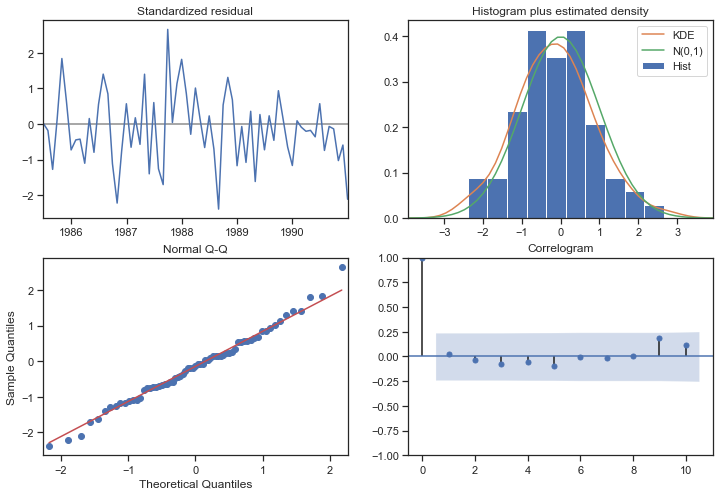

In [146]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model :

In [147]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [148]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1063.389112  430.612502     219.404117    1907.374107
1991-02-28  1129.372150  459.286526     229.187100    2029.557200
1991-03-31  1258.354728  459.241441     358.258043    2158.451413
1991-04-30  1422.651519  482.711909     476.553561    2368.749476
1991-05-31  1168.858922  483.095854     222.008447    2115.709397

In [150]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 987.6954135372233


In [152]:
temp_resultsDf = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['SARIMA(2,1,3)(1,2,3,12)'])


resultsDf10 = pd.concat([resultsDf9,temp_resultsDf])

resultsDf10

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
SARIMA(1,2,3)(1,2,3,6)                     2183.422671
SARIMA(3,1,2)(2,2,2,6)                     1004.294989
SARIMA(2,1,3)(1,2,3,12)                     987.695414

### ACF and PACF plot of the time series data with the seasonality as 12:

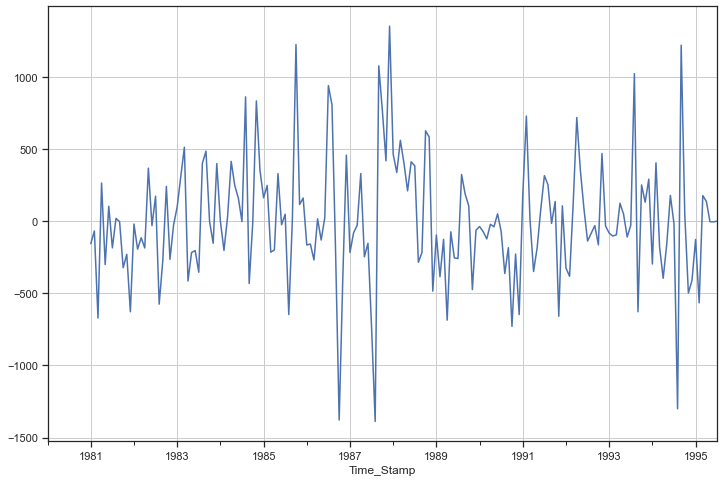

In [153]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

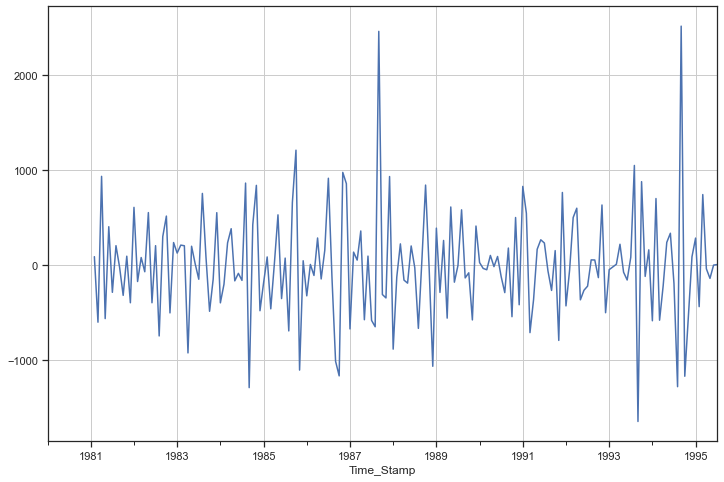

In [154]:
# We can see there is a slight trend present in the data:
# So we take a differencing of first order on the seasonally differenced series.

(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

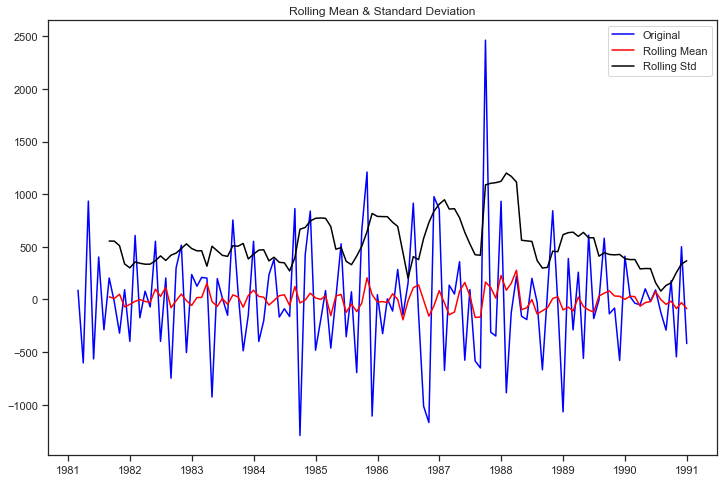

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [155]:
### Checking for the stationarity of the above series:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

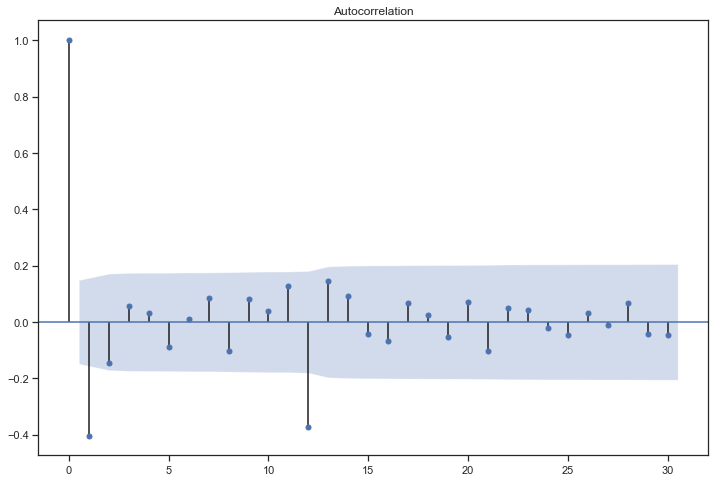

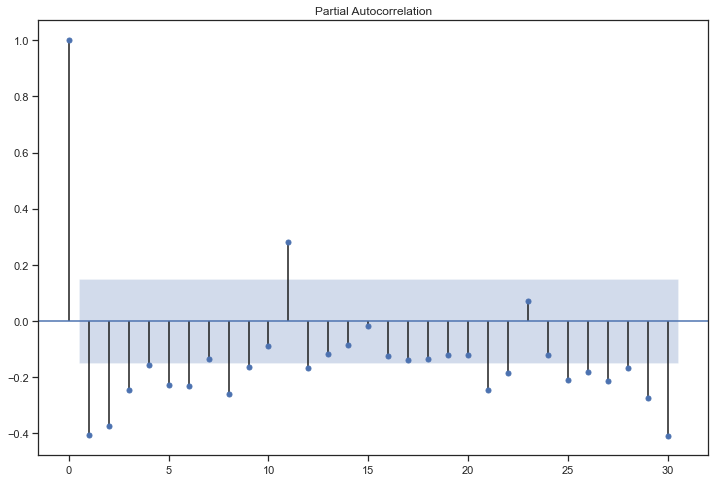

In [156]:
# Checking the new ACF and PACF plots for the new modified time series:

plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [159]:
# Here, P = 1 and Q = 1 
# p = 4 and q = 1

import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(4,2,2),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  132
Model:             SARIMAX(4, 2, 2)x(1, 0, [1], 12)   Log Likelihood                -844.211
Date:                              Tue, 18 May 2021   AIC                           1706.423
Time:                                      07:19:03   BIC                           1731.049
Sample:                                  01-31-1980   HQIC                          1716.417
                                       - 12-31-1990                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0575      0.144      0.401      0.689      -0.224       0.339
ar.L2         -0.15

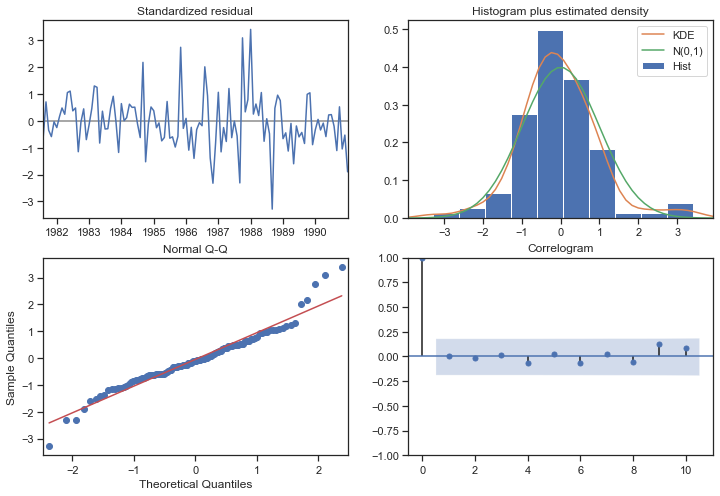

In [160]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

### Predict on the Test Set using this model and evaluate the model:

In [161]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [162]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1227.383300  384.232458     474.301521    1980.465080
1991-02-28  1078.030325  396.386763     301.126545    1854.934105
1991-03-31  1453.479647  397.120605     675.137564    2231.821730
1991-04-30  1343.742742  405.347885     549.275486    2138.209998
1991-05-31  1145.661228  407.258736     347.448774    1943.873682

In [163]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print('Test RMSE:',rmse)

Test RMSE: 1659.8310739471203


### Table listing of all the models with their respective RMSE values on the test data:

In [164]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(4,2,2)(1,0,1,12)'])


resultsDf11 = pd.concat([resultsDf10,temp_resultsDf])

resultsDf11

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
SARIMA(1,2,3)(1,2,3,6)                     2183.422671
SARIMA(3,1,2)(2,2,2,6)                     1004.294989
SARIMA(2,1,3)(1,2,3,12)                     987.695414
SARIMA(4,2,2)(1,0,1,12)                    1659.831074

### Building the second most optimum model on the full data:

In [203]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,3),
                                seasonal_order=(1,2,3,12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 3)x(1, 2, 3, 12)   Log Likelihood                -938.309
Date:                            Tue, 18 May 2021   AIC                           1896.617
Time:                                    10:55:26   BIC                           1924.657
Sample:                                01-31-1980   HQIC                          1908.006
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7504      0.233      7.522      0.000       1.294       2.206
ar.L2         -0.9486      0.204   

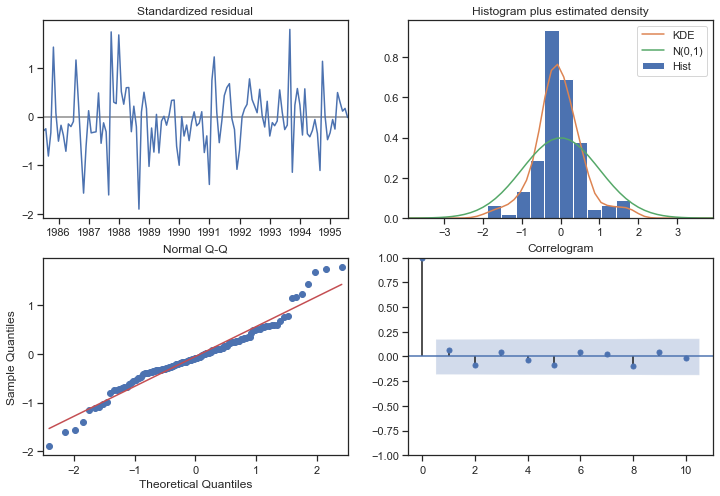

In [204]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future:

In [205]:
predicted_manual_SARIMA_12full_data = results_full_data_model.get_forecast(steps=12)

In [206]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1893.038088  709.065338     503.295563    3282.780612
1995-09-30  2547.472599  712.504086    1150.990252    3943.954947
1995-10-31  3415.418489  714.243869    2015.526230    4815.310748
1995-11-30  3867.011353  715.256349    2465.134669    5268.888038
1995-12-31  6194.572842  716.187447    4790.871240    7598.274444

In [207]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 812.4301037145698


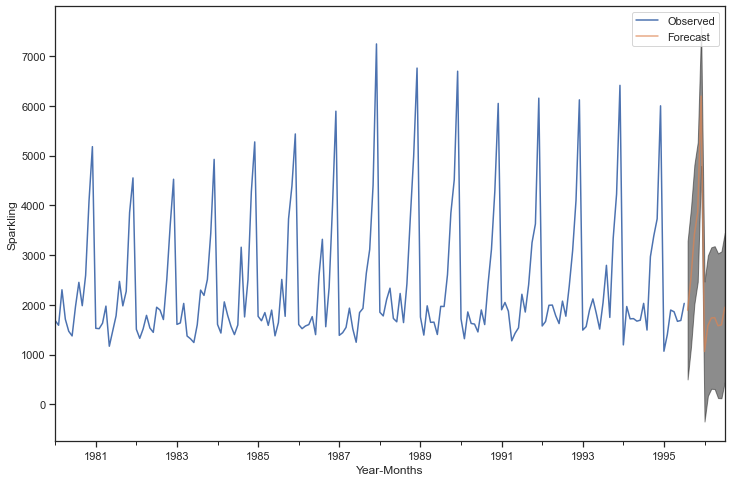

In [208]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.5)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

### Table listing of all the models with their respetive RMSE:

In [196]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA_future data(4,2,2)(1,0,1,12)'])


resultsDf12 = pd.concat([resultsDf11,temp_resultsDf])

resultsDf12

Test RMSE
Alpha=0.0,SES                              1275.081801
Alpha=0.08,Beta=3.0065e-11,Gamma=0.47:TES   362.723961
Alpha=0.154,Beta=5.41e-21,Gamma=0.37:TES    383.187951
Alpha=0.1,Beta=1.0,Gamma=0.2:TES            304.315086
RegressionOnTime                           1389.135175
NaiveModel                                 3864.279352
SimpleAverageModel                         1275.081804
SARIMA(1,2,3)(1,2,3,6)                     2183.422671
SARIMA(3,1,2)(2,2,2,6)                     1004.294989
SARIMA(2,1,3)(1,2,3,12)                     987.695414
SARIMA(4,2,2)(1,0,1,12)                    1659.831074
SARIMA_full data(4,2,2)(1,0,1,12)           366.563623